## About this document
This document contains the analysis and report for the Assessment of CASA0006-Data Science for Spatial Systems

The notebook requires approx XXX time to run (include specs of my PC)

Student ID: 21203086
Word count: XXX

--------------------------------------------------------------------------------------------------------------------------------

# TITLE XXXXXX

<a id="ID_intr"></a>
| [1.0 Introduction](#ID_intro) | [2.0 Literature review](#ID_lit) | [3.0 Research Question](#ID_RQ) | [4.0 Presentation of Data](#ID_data) | [5.0 Methodology](#ID_methods) | [6.0 Results](#ID_results) | [7.0 Discussion](#ID_disc) | [8.0 Conclusion](#ID_concl) | [Bibliography](#ID_biblio) | [Appendix](#ID_append) |

<a id="ID_intro"></a>
## 1.0 | Introduction 

This paper studies .... 
quick summary
text text

According to the Understanding Inequalities project ''the housing market has a key role in "sorting" poorer households into areas with the worst pollution, schools, crime and employ-ment. ''(Housing | Understanding Inequalities, 2022). This study will therefore investigate if there is a relationship between a variety of indicators for environmental, health and socioeco-nomic features that compose a census tract and house prices in the same area. The case study chosen is California and the baseline assumption is that pollution, unemployment, and poor health statistics will be reflected in the overall house price trend. 

<a id="ID_lit"></a>
## 2.0 | Literature Review

Text text text


<a id="ID_RQ"></a>
## 3.0 | Research Question

R.Q.: Can house prices be predicted from data on environmental, health, and socioeconomic information of a census tract?

    RQ1 | text 
    RQ2 | text?

<a id="ID_data"></a>
## 4.0 | Presentation of Data

The data used for this analysis were obtained from the following sources:
* [CalEnviroScreen 4.0](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40), downloaded 06 April 2021:

   - Who
   [FEDERAL HOUSING FINACE AGENCY](https://www.fhfa.gov/)
   - Where from
   - What
   - Data 
   - Explanation/description

* [House Price Index Census Tracts](https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx), downloaded 04 April 2021:

   - Who
   - Where from
   - What (http://proximityone.com/hpizip.htm)
   - Data 
   - House price index definition

According to the data dictionary provided on the website:
"The FHFA House Price Index (HPI) is a broad measure of the movement of single-family house prices.  The HPI is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties. This information is obtained by reviewing repeat mortgage transactions on single-family properties whose mortgages have been purchased or securitized by Fannie Mae or Freddie Mac since January 1975."



For ease of access the data has been saved in this [GitHub repository](https://github.com/DaphneBdn/dsss_repo) 

<a id="ID_methods"></a>
## 5.0 | Methodology

Outline of methodology....text text text
mention hedonic regression. Why I am NOT using it
https://www.investopedia.com/terms/h/hedonic-regression.asp

* data cleaning (and validation?)
* data pre-processing
* comprehnsive analysis

NOTES:

* OLS regression: why not
* Discuss NA values
* Discuss outliers and outlier robustness of each model 
* train/test spit
* validation methods

RF: Robust to Outliers and Non-linear Data. Random forest handles outliers by essentially binning them. It is also indifferent to non-linear features.[LINK](https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706)

Lasso: modification of LINEAR regression. 

### 5.1 Data Cleaning

In [1]:
# data manipulation and processing
#import os
import math
import numpy as np
import pandas as pd

# analysis

import re #regular expressions
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
import statsmodels.api as sm


# Packages for visualisation
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

# reproducability settings
random_state = 42 
np.random.seed(random_state)

from time import time

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline


#### 5.1.1 House Price Index data

In [2]:
# Load in the House Price Index data 
#dfprice = pd.read_csv('https://github.com/DaphneBdn/dsss_repo/blob/main/data/raw/HPI_AT_BDL_tract.csv')
dfprice = pd.read_csv('data/raw/HPI_AT_BDL_tract.csv')
dfprice.head(5)

tract state_abbr  year                            annual_change  \
0  1001020100         AL  1998                                      NaN   
1  1001020100         AL  1999                                  -5.6000   
2  1001020100         AL  2000                                   5.0600   
3  1001020100         AL  2001                                   7.0800   
4  1001020100         AL  2002                                   7.1100   

                                       hpi  hpi1990  \
0                                 100.0000      NaN   
1                                  94.4000      NaN   
2                                  99.1800      NaN   
3                                 106.2100      NaN   
4                                 113.7600      NaN   

                                   hpi2000  
0                                 100.8200  
1                                  95.1800  
2                                 100.0000  
3                                 107.0800  
4                                 114.7000

In [3]:
dfprice.tail(5)

tract state_abbr  year  \
1900550  56045951300         WY  2017   
1900551  56045951300         WY  2018   
1900552  56045951300         WY  2019   
1900553  56045951300         WY  2020   
1900554  56045951300         WY  2021   

                                   annual_change  \
1900550                                  -0.6100   
1900551                                   1.7900   
1900552                                   7.5800   
1900553                                  -0.2700   
1900554                                  15.3200   

                                             hpi  hpi1990  hpi2000  
1900550                                 175.7900      NaN      NaN  
1900551                                 178.9400      NaN      NaN  
1900552                                 192.5000      NaN      NaN  
1900553                                 191.9800      NaN      NaN  
1900554                                 221.3800      NaN      NaN

In [4]:
#check the size of the dataframe
dfprice.shape

(1900555, 7)

In [5]:
# check the datatype of each column 
dfprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900555 entries, 0 to 1900554
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   tract          int64  
 1   state_abbr     object 
 2   year           int64  
 3   annual_change  float64
 4   hpi            float64
 5   hpi1990        float64
 6   hpi2000        float64
dtypes: float64(4), int64(2), object(1)
memory usage: 101.5+ MB


After the first inspection of the data the key things to note are: 
* There are 1,048,575 entries in total, containing information for the whole State of Califonia
* There are multiple NA values which will need to be adressed. 
* The data covers the years 1998-2021
* There are no categorical variables

#### subseting/filtering

The dataset will be subsetted to:
* Extract census tracts of California only.
* Keep only 'hpi' as the dependent variable, as this is the HPI with the most recent base year
* Year: keep the most recent year with the least NA values

According to the data dictionary...

In [6]:
dfCAall = dfprice[dfprice['state_abbr']=="CA"]

In [7]:
dfCAall.shape

(264546, 7)

In [8]:
columns = dfCAall.columns
columns

Index(['tract', 'state_abbr', 'year', 'annual_change', 'hpi', 'hpi1990',
       'hpi2000'],
      dtype='object')

In [9]:
todrop=['annual_change', 'hpi1990','hpi2000']

In [10]:
dfCAall.drop(columns=todrop, inplace=True)
dfCAall

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


tract state_abbr  year                                      hpi
77893   6001400100         CA  1986                                 100.0000
77894   6001400100         CA  1987                                 103.2700
77895   6001400100         CA  1988                                 129.8600
77896   6001400100         CA  1989                                 142.8300
77897   6001400100         CA  1990                                 150.8500
...            ...        ...   ...                                      ...
342434  6115041102         CA  2017                                 175.5200
342435  6115041102         CA  2018                                 199.4500
342436  6115041102         CA  2019                                 211.9000
342437  6115041102         CA  2020                                 224.9700
342438  6115041102         CA  2021                                 260.6800

[264546 rows x 4 columns]

In [11]:
# check the number of tracts
dfCAall['tract'].nunique()

7720

In [12]:
#check the NA values
dfCAall.isna().sum().sort_values(ascending=False)

hpi           7757
tract            0
state_abbr       0
year             0
dtype: int64

In [13]:
# Check the NAs in the HPI column in the 5 most recent years

yearlist = [2018,2019,2020,2021]

for i in yearlist: 
    dftemp = dfCAall[dfCAall['year']==i]
    print(f'Year {i} has {dftemp.hpi.isna().sum()} NA values in the HPI column')
    

Year 2018 has 863 NA values in the HPI column
Year 2019 has 551 NA values in the HPI column
Year 2020 has 89 NA values in the HPI column
Year 2021 has 149 NA values in the HPI column


In [14]:
# keep HPI for 2020 as it is the year with the least NA values
price20 = dfCAall[dfCAall['year']==2020]
price20.head()

tract state_abbr  year                                      hpi
77927  6001400100         CA  2020                                 571.1800
77963  6001400200         CA  2020                                 672.2000
78006  6001400300         CA  2020                               1,405.3600
78049  6001400400         CA  2020                               1,407.0000
78085  6001400500         CA  2020                                 852.2900

In [15]:
# check the number of tracts
price20['tract'].nunique()

7717

#### 5.1.2 CalEnviro Data

In [16]:
#env21= pd.read_excel('https://github.com/DaphneBdn/dsss_repo/blob/main/data/raw/calenviroscreen40resultsdatadictionary_F_2021.xlsx', sheet_name="CES4.0FINAL_results")

env21= pd.read_excel('data/raw/calenviroscreen40resultsdatadictionary_F_2021.xlsx', sheet_name="CES4.0FINAL_results")
env21.head()

Census Tract  Total Population California County    ZIP  \
0    6019001100              2780           Fresno   93706   
1    6077000700              4680       San Joaquin  95206   
2    6037204920              2751       Los Angeles  90023   
3    6019000700              3664           Fresno   93706   
4    6019000200              2689           Fresno   93706   

  Approximate Location                                Longitude  \
0               Fresno                                -119.7817   
1             Stockton                                -121.2879   
2          Los Angeles                                -118.1975   
3               Fresno                                -119.8277   
4               Fresno                                -119.8055   

                                  Latitude  \
0                                  36.7097   
1                                  37.9432   
2                                  34.0175   
3                                  36.7345   
4                                  36.7355   

                             CES 4.0 Score  \
0                                  93.1836   
1                                  86.6538   
2                                  82.3939   
3                                  81.3279   
4                                  80.7455   

                        CES 4.0 Percentile  CES 4.0 Percentile Range  ...  \
0                                 100.0000  95-100% (highest scores)  ...   
1                                  99.9874  95-100% (highest scores)  ...   
2                                  99.9748  95-100% (highest scores)  ...   
3                                  99.9622  95-100% (highest scores)  ...   
4                                  99.9496  95-100% (highest scores)  ...   

                 Linguistic Isolation Pctl  \
0                                  79.3747   
1                                  95.5339   
2                                  81.5537   
3                                  78.7116   
4                                  86.5611   

                                   Poverty  \
0                                  76.0000   
1                                  73.2000   
2                                  62.6000   
3                                  65.7000   
4                                  72.7000   

                              Poverty Pctl  \
0                                  98.9196   
1                                  98.3920   
2                                  93.3920   
3                                  95.3518   
4                                  98.3040   

                              Unemployment  \
0                                  12.8000   
1                                  19.8000   
2                                   6.4000   
3                                  15.7000   
4                                  13.7000   

                         Unemployment Pctl  \
0                                  93.8313   
1                                  99.2061   
2                                  61.5305   
3                                  97.3451   
4                                  95.2889   

                            Housing Burden  \
0                                  30.3000   
1                                  31.2000   
2                                  20.3000   
3                                  35.4000   
4                                  32.7000   

                       Housing Burden Pctl  \
0                                  91.0393   
1                                  92.2814   
2                                  63.9670   
3                                  96.4132   
4                                  94.1572   

                               Pop. Char.   \
0                                  93.1551   
1                                  93.1654   
2                                  83.7518   
3                                  94.6412   
4                                  95.398

In [17]:
env21.shape

(8035, 58)

In [18]:
env21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   int64  
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8    CES 4.0 Percentile          7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

In [19]:
# extract the column names
cols=env21.columns
print(cols)
print()
print(f"The Enviro 3.0 dataset has {len(cols)} columns")

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'CES 4.0 Score',
       ' CES 4.0 Percentile', 'CES 4.0 Percentile Range', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Lead', 'Lead Pctl',
       'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl',
       'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl'

In [20]:
# check the NA values in the dataset 
env21.isna().sum().sort_values(ascending=False)

Unemployment Pctl              335
Unemployment                   335
Linguistic Isolation           320
Linguistic Isolation Pctl      320
Low Birth Weight Pctl          227
Low Birth Weight               227
Housing Burden Pctl            145
Housing Burden                 145
Pop. Char. Pctl                103
Education Pctl                 103
Education                      103
CES 4.0 Percentile Range       103
 CES 4.0 Percentile            103
CES 4.0 Score                  103
Pop. Char.                     103
Pop. Char. Score               103
Lead                            96
Lead Pctl                       96
Poverty Pctl                    75
Poverty                         75
Traffic Pctl                    35
Traffic                         35
Drinking Water                  28
Drinking Water Pctl             28
Cardiovascular Disease          11
Cardiovascular Disease Pctl     11
Asthma Pctl                     11
Asthma                          11
Solid Waste         

In [21]:
# drop the generalised indicators and percentiles, to work with the raw data

In [22]:
env21.drop("Pollution Burden", axis=1, inplace=True) 

In [23]:
env21.drop("Pollution Burden Score", axis=1, inplace=True)

In [24]:
dfsub = env21[env21.columns.drop(list(env21.filter(regex='Pctl')))]

In [25]:
dfsub = dfsub[dfsub.columns.drop(list(dfsub.filter(regex='Char')))]

In [26]:
dfsub = dfsub[dfsub.columns.drop(list(dfsub.filter(regex='CES')))]
dfsub.head()

Census Tract  Total Population California County    ZIP  \
0    6019001100              2780           Fresno   93706   
1    6077000700              4680       San Joaquin  95206   
2    6037204920              2751       Los Angeles  90023   
3    6019000700              3664           Fresno   93706   
4    6019000200              2689           Fresno   93706   

  Approximate Location                                Longitude  \
0               Fresno                                -119.7817   
1             Stockton                                -121.2879   
2          Los Angeles                                -118.1975   
3               Fresno                                -119.8277   
4               Fresno                                -119.8055   

                                  Latitude  \
0                                  36.7097   
1                                  37.9432   
2                                  34.0175   
3                                  36.7345   
4                                  36.7355   

                                     Ozone  \
0                                   0.0603   
1                                   0.0459   
2                                   0.0479   
3                                   0.0603   
4                                   0.0603   

                                     PM2.5  \
0                                  13.9063   
1                                  11.8841   
2                                  12.2516   
3                                  13.5209   
4                                  13.8190   

                                 Diesel PM  ...  Imp. Water Bodies  \
0                                   1.1227  ...                  0   
1                                   0.5381  ...                 13   
2                                   0.7808  ...                  7   
3                                   0.1738  ...                  0   
4                                   1.3897  ...                  0   

                               Solid Waste  \
0                                   6.0000   
1                                   9.2500   
2                                   4.8500   
3                                   5.7500   
4                                   0.0000   

                                    Asthma  \
0                                 129.5400   
1                                 105.8800   
2                                  76.1000   
3                                 139.4500   
4                                 139.0800   

                          Low Birth Weight  \
0                                   7.8000   
1                                   6.8800   
2                                   7.1100   
3                                  10.6500   
4                                  10.2500   

                    Cardiovascular Disease  \
0                                  21.4700   
1                                  20.2600   
2                                  20.8700   
3                                  22.6800   
4                                  22.6400   

                                 Education  \
0                                  44.5000   
1                                  46.4000   
2                                  52.2000   
3                                  41.4000   
4                                  43.6000   

                      Linguistic Isolation  \
0                                  16.0000   
1                                  29.7000   
2                                  17.1000   
3                                  15.7000   
4                                  20.0000   

                                   Poverty  \
0                                  76.0000   
1                                  73.2000   
2                                  62.6000   
3                                  65.7000   
4                                  72.7000   

                              Unempl

In [27]:
# drop rows with NA values
dfsub.dropna(axis=0, how='any', inplace=True)
#check it worked
dfsub.isna().sum().sort_values(ascending=False)

Census Tract              0
Total Population          0
Unemployment              0
Poverty                   0
Linguistic Isolation      0
Education                 0
Cardiovascular Disease    0
Low Birth Weight          0
Asthma                    0
Solid Waste               0
Imp. Water Bodies         0
Haz. Waste                0
Groundwater Threats       0
Cleanup Sites             0
Traffic                   0
Tox. Release              0
Pesticides                0
Lead                      0
Drinking Water            0
Diesel PM                 0
PM2.5                     0
Ozone                     0
Latitude                  0
Longitude                 0
Approximate Location      0
ZIP                       0
California County         0
Housing Burden            0
dtype: int64

In [28]:
#check the size of the dataframe after the NA removal
dfsub.shape

(7355, 28)

In [29]:
# check the number of tracts
dfsub['Census Tract'].nunique()

7355

NOTE 
According to [United Staes Census Bureau](https://www.census.gov/geographies/reference-files/2010/geo/state-local-geo-guides-2010/california.html), California has **8,057** census tracts

After NA removal:
The Enviro dataset lists 7355
The HPI lists 7717

In [30]:
# merge the enviro data with the HPI data with an inner join 
cal_joined = pd.merge(dfsub, price20, left_on = "Census Tract", right_on = "tract", how = "inner")
cal_joined

Census Tract  Total Population California County    ZIP  \
0       6077000700              4680       San Joaquin  95206   
1       6037204920              2751       Los Angeles  90023   
2       6019001202              4561           Fresno   93725   
3       6037291220              3640       Los Angeles  90247   
4       6037243100              6772       Los Angeles  90059   
...            ...               ...               ...    ...   
5591    6001421600              3617          Alameda   94708   
5592    6081609700              4936         San Mateo  94062   
5593    6085507302              2892       Santa Clara  95070   
5594    6081609601              3363         San Mateo  94070   
5595    6041126100              6195            Marin   94941   

                        Approximate Location  \
0                                   Stockton   
1                                Los Angeles   
2          Unincorporated Fresno County area   
3                                Los Angeles   
4                                Los Angeles   
...                                      ...   
5591                                Berkeley   
5592                            Redwood City   
5593  Unincorporated Santa Clara County area   
5594                              San Carlos   
5595                             Mill Valley   

                                    Longitude  \
0                                   -121.2879   
1                                   -118.1975   
2                                   -119.7410   
3                                   -118.2867   
4                                   -118.2351   
...                                       ...   
5591                                -122.2560   
5592                                -122.2803   
5593                                -122.0292   
5594                                -122.2833   
5595                                -122.5405   

                                     Latitude  \
0                                     37.9432   
1                                     34.0175   
2                                     36.7027   
3                                     33.8771   
4                                     33.9328   
...                                       ...   
5591                                  37.8840   
5592                                  37.4682   
5593                                  37.2383   
5594                                  37.4953   
5595                                  37.9122   

                                        Ozone  \
0                                      0.0459   
1                                      0.0479   
2                                      0.0613   
3                                      0.0413   
4                                      0.0438   
...                                       ...   
5591                                   0.0294   
5592                                   0.0330   
5593                                   0.0398   
5594                                   0.0319   
5595                                   0.0319   

                                        PM2.5  \
0                                     11.8841   
1                                     12.2516   
2                                     13.9661   
3                                     12.0661   
4                                     12.0902   
...                                       ...   
5591                                   8.9978   
5592                                   7.9757   
5593                                   7.2742   
5594                                   8.0768   
5595                                   8.4158   

                                    Diesel PM  ...  \
0                                      0.5381  ...   
1                                      0.7808  ...   
2                                      0.2029  ...   
3                                      0.6369  ...   
4                     

In [31]:
#cal_joined[cal_joined.isna().any(axis=1)]

In [32]:
# the rows with missing information after the join will need to be dropped
cal_joined.dropna(axis=0, how='any', inplace=True)
cal_joined.shape

(5535, 32)

In [33]:
# print out the column names
cal_joined.columns

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'Ozone', 'PM2.5',
       'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides', 'Tox. Release',
       'Traffic', 'Cleanup Sites', 'Groundwater Threats', 'Haz. Waste',
       'Imp. Water Bodies', 'Solid Waste', 'Asthma', 'Low Birth Weight',
       'Cardiovascular Disease', 'Education', 'Linguistic Isolation',
       'Poverty', 'Unemployment', 'Housing Burden', 'tract', 'state_abbr',
       'year', 'hpi'],
      dtype='object')

In [34]:
# create a list of the columns to be dropped, in order to keep only the dependent and independent variabels

todrop = ['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'tract', 'state_abbr',
       'year']

In [35]:
dfall = cal_joined.drop(columns=todrop)
dfall.head()

Ozone  \
0                                   0.0459   
1                                   0.0479   
2                                   0.0613   
3                                   0.0413   
4                                   0.0438   

                                     PM2.5  \
0                                  11.8841   
1                                  12.2516   
2                                  13.9661   
3                                  12.0661   
4                                  12.0902   

                                 Diesel PM  \
0                                   0.5381   
1                                   0.7808   
2                                   0.2029   
3                                   0.6369   
4                                   0.8055   

                            Drinking Water  \
0                                 389.8466   
1                                 787.9403   
2                                 788.3096   
3                                 805.5744   
4                                 787.9403   

                                      Lead  \
0                                  77.3023   
1                                  92.5637   
2                                  60.3589   
3                                  66.0691   
4                                  75.6277   

                                Pesticides  \
0                                  63.1326   
1                                   0.0000   
2                                   8.9936   
3                                  66.4967   
4                                   0.0000   

                              Tox. Release  \
0                                 519.6280   
1                               3,682.6933   
2                              25,576.2579   
3                              19,774.7897   
4                               8,878.6133   

                                   Traffic  \
0                                 856.3959   
1                               2,522.6223   
2                                 438.5941   
3                               3,455.2393   
4                               2,484.9657   

                             Cleanup Sites  \
0                                  61.9000   
1                                  38.7500   
2                                  31.1500   
3                                  16.0000   
4                                  16.9000   

                       Groundwater Threats  ...  \
0                                  78.6000  ...   
1                                  20.5000  ...   
2                                  48.5500  ...   
3                                  37.5500  ...   
4                                  13.1500  ...   

                               Solid Waste  \
0                                   9.2500   
1                                   4.8500   
2                                   7.0000   
3                                   4.2000   
4                                   0.2000   

                                    Asthma  \
0                                 105.8800   
1                                  76.1000   
2                                  89.2700   
3                                  64.7700   
4                                 129.2000   

                          Low Birth Weight  \
0                                   6.8800   
1                                   7.1100   
2                                   6.8300   
3                                   7.7700   
4                                   9.4800   

                    Cardiovascular Disease  \
0                                  20.2600   
1                                  20.8700   
2                                  14.1300   
3                                  12.9900   
4                                  26.4800   

                                 Education  \
0                                  46.4000   
1                                  52

#### 5.1.3 summary statistics

In [36]:
dfall.describe()

Ozone  \
count                               5,535.0000   
mean                                    0.0486   
std                                     0.0104   
min                                     0.0266   
25%                                     0.0413   
50%                                     0.0472   
75%                                     0.0566   
max                                     0.0731   

                                         PM2.5  \
count                               5,535.0000   
mean                                   10.1831   
std                                     2.0657   
min                                     3.1197   
25%                                     8.6040   
50%                                    10.0492   
75%                                    11.9174   
max                                    16.3769   

                                     Diesel PM  \
count                               5,535.0000   
mean                                    0.2027   
std                                     0.2076   
min                                     0.0002   
25%                                     0.0695   
50%                                     0.1411   
75%                                     0.2664   
max                                     2.6059   

                                Drinking Water  \
count                               5,535.0000   
mean                                  465.4533   
std                                   216.2334   
min                                    32.5689   
25%                                   296.5551   
50%                                   417.6774   
75%                                   669.8410   
max                                 1,179.4788   

                                          Lead  \
count                               5,535.0000   
mean                                   49.6003   
std                                    22.7937   
min                                     0.0000   
25%                                    31.6727   
50%                                    49.7865   
75%                                    67.4196   
max                                    97.7963   

                                    Pesticides  \
count                               5,535.0000   
mean                                  256.6686   
std                                 2,358.2817   
min                                     0.0000   
25%                                     0.0000   
50%                                     0.0000   
75%                                     0.0948   
max                                80,811.0894   

                                  Tox. Release  \
count                               5,535.0000   
mean                                1,597.2422   
std                                 3,487.9066   
min                                     0.0000   
25%                                   120.5359   
50%                                   469.0310   
75%                                 1,565.4675   
max                                80,652.8900   

                                       Traffic  \
count                               5,535.0000   
mean                                1,129.5516   
std                                 1,035.0284   
min                                    20.9201   
25%                                   565.8538   
50%                                   878.2087   
75%                                 1,398.1674   
max                                45,752.0000   

                                 Cleanup Sites  \
count                               5,535.0000   
mean                                    7.7277   
std                                    14.7003   
min                                     0.0000   
25%                                     0.0000   
50%                                     1.7500   
75%                                     9.6750   
max                              

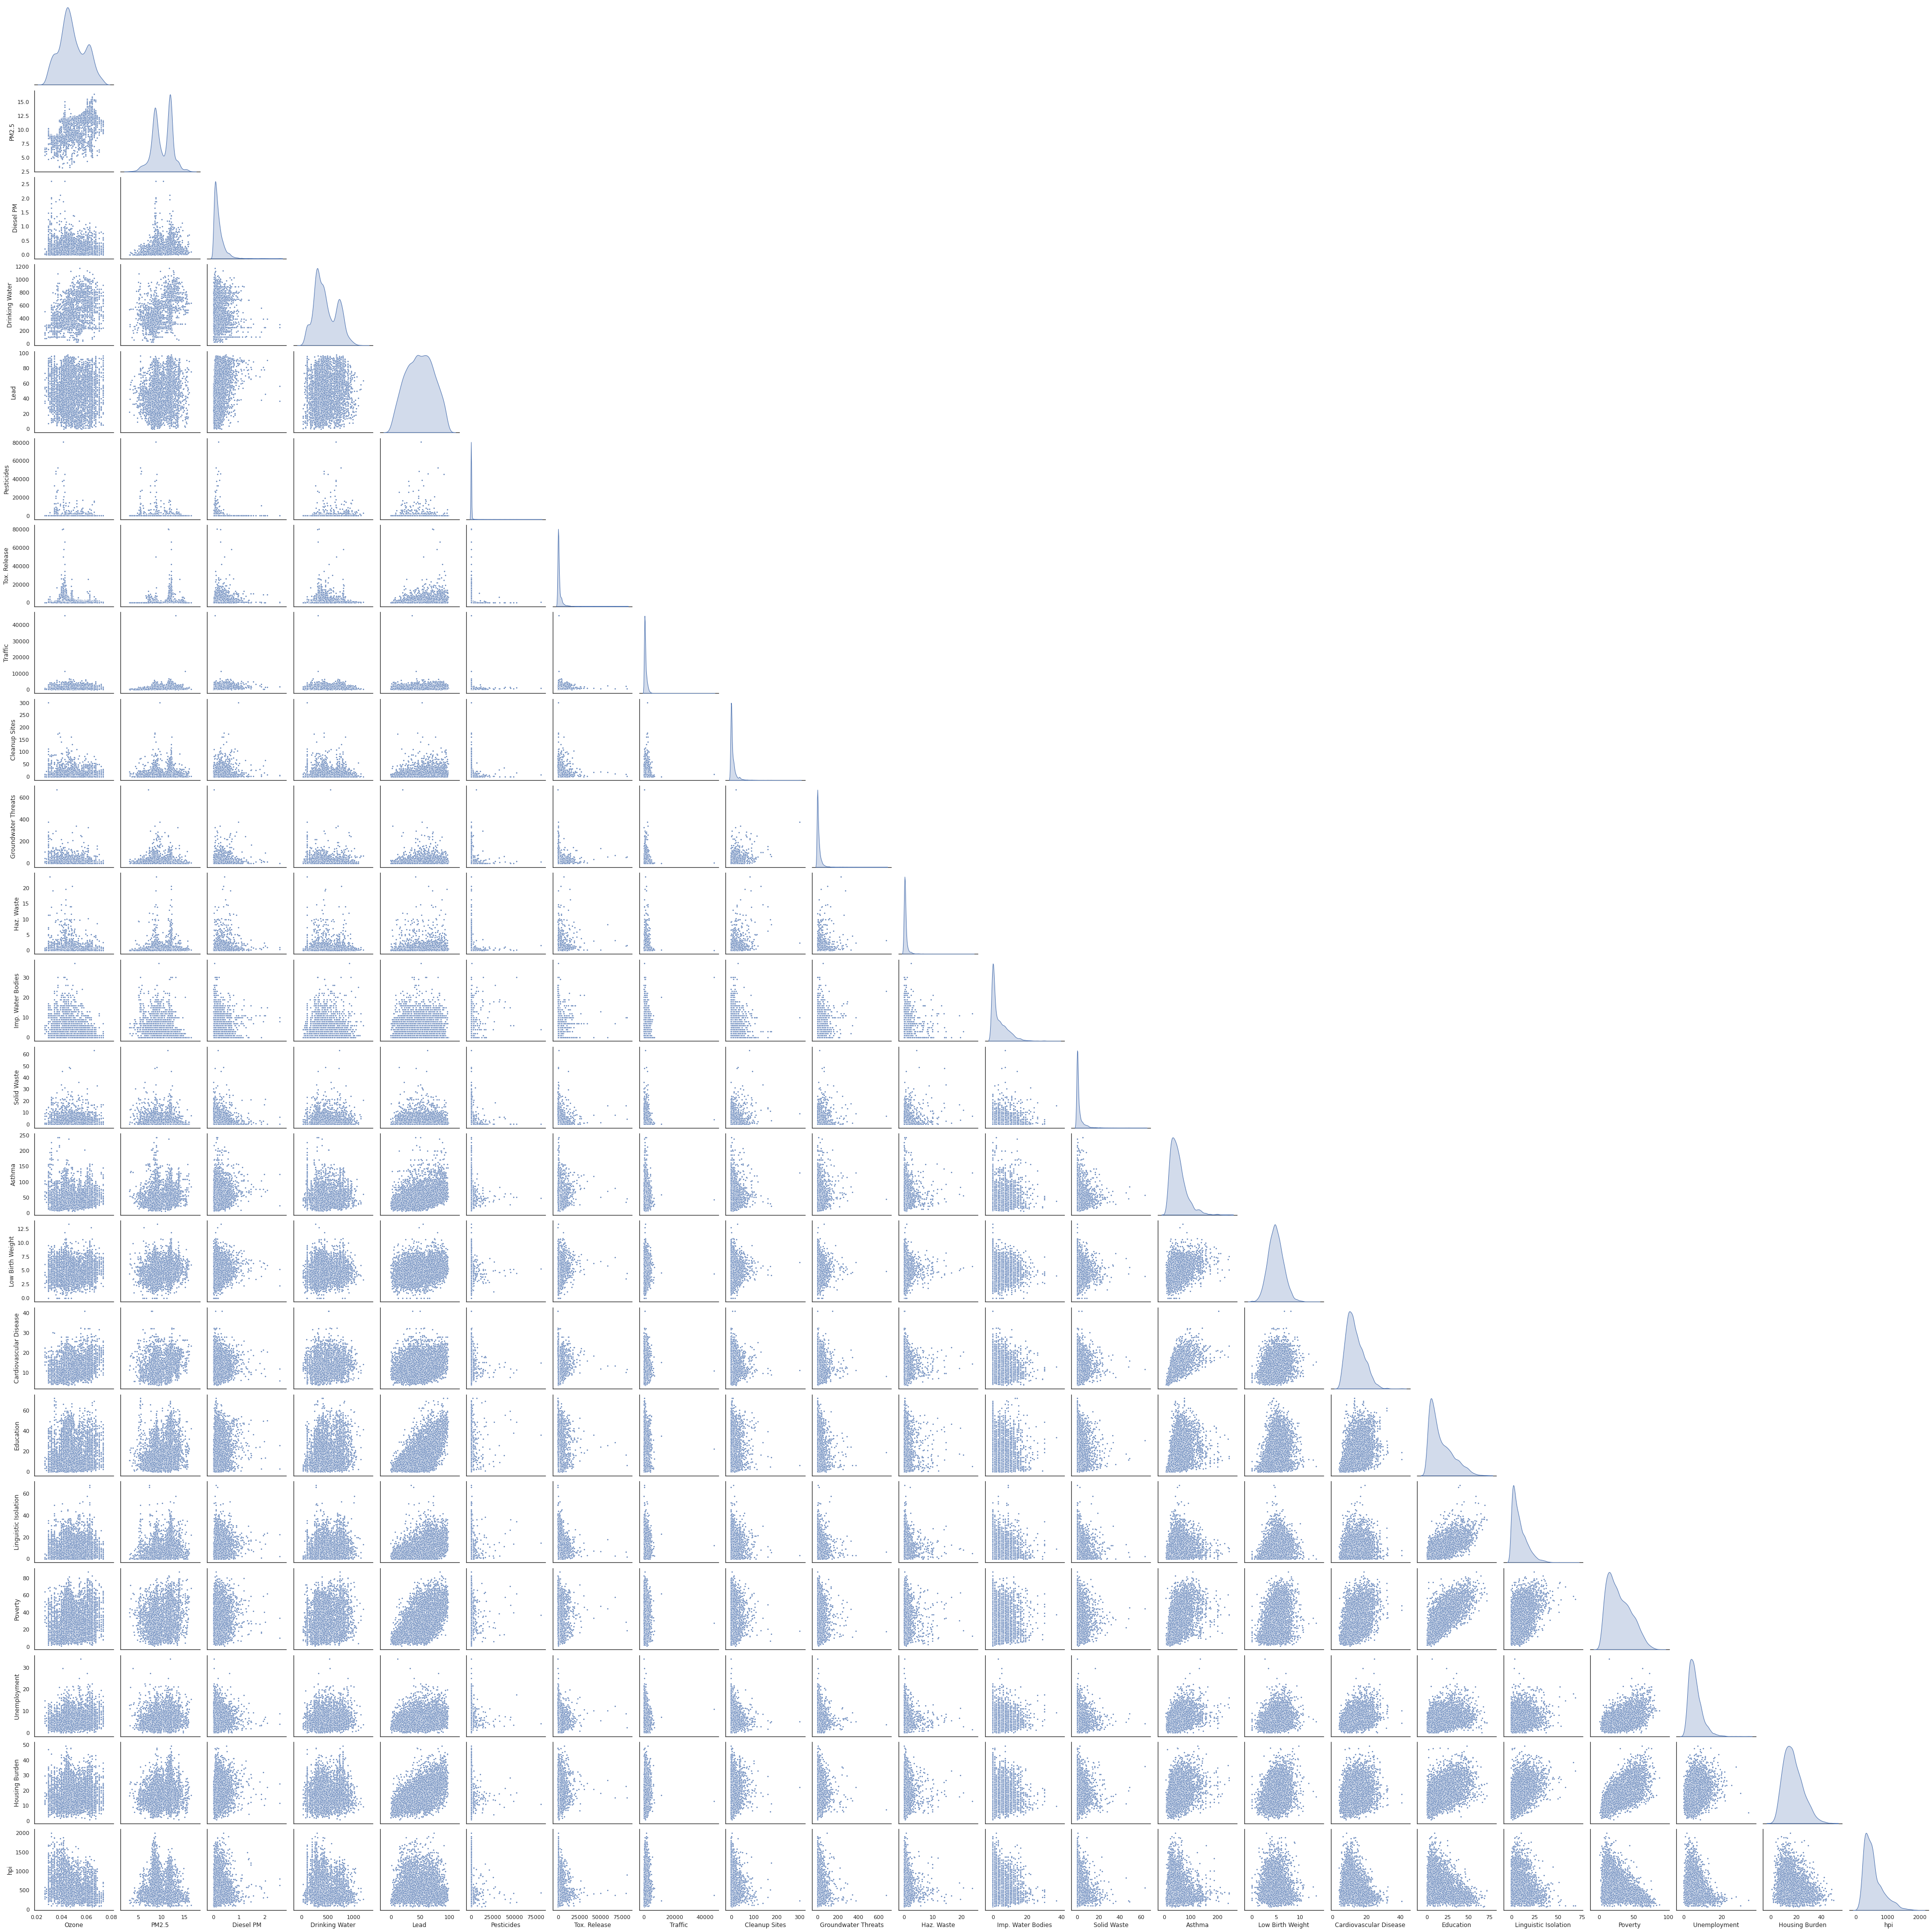

In [37]:
# use a quick plot to visualise the distribution of the variables
sns.set(style="white")
sns.pairplot(data=dfall, markers=".", diag_kind='kde', corner=True)

The KDE plots above show that most of the variables are not normaly distributed. Furthermore, as the last row of the scatterplots shows. none of the independent variables displays a linear relationship with the dependent variable(hpi). Therefore a multivariate linear regression model will not be appropriate for explaining this relationship.

array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'Drinking Water'}>,
        <AxesSubplot:title={'center':'Traffic'}>,
        <AxesSubplot:title={'center':'Haz. Waste'}>],
       [<AxesSubplot:title={'center':'Solid Waste'}>,
        <AxesSubplot:title={'center':'Asthma'}>,
        <AxesSubplot:title={'center':'Low Birth Weight'}>,
        <AxesSubplot:title={'center':'Cardiovascular Disease'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Linguistic Isolation'}>,
        <AxesSubplot:title={'center':'Poverty'}>,
        <AxesSubplot:title={'center':'Unemployment'}>],
       [<AxesSubplot:title={'center':'Housing Burden'}>,
        <AxesSubplot:title={'center':'hpi'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

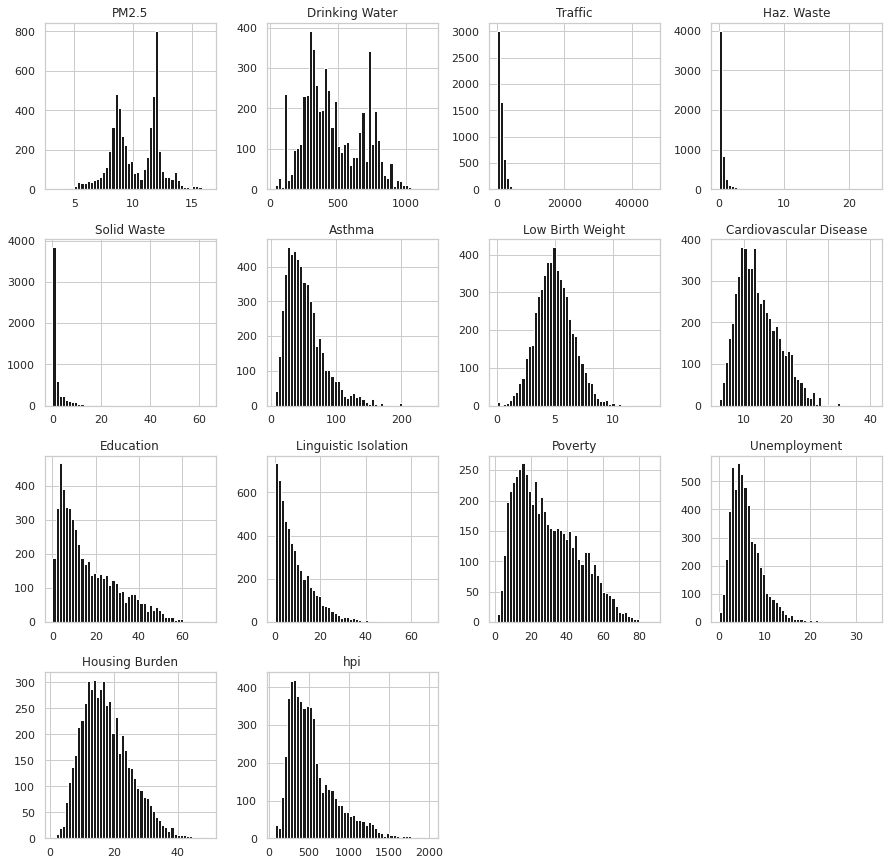

In [91]:
dfall.hist(bins=50, figsize=(15, 15),color='k')

<AxesSubplot:ylabel='Frequency'>

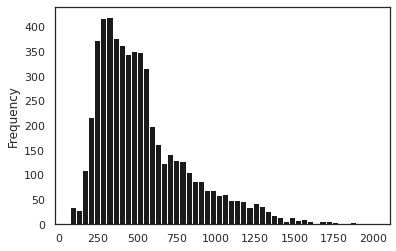

In [38]:
## plot histogram 
dfall['hpi'].plot.hist(bins=50 ,color='k') 



<AxesSubplot:ylabel='Frequency'>

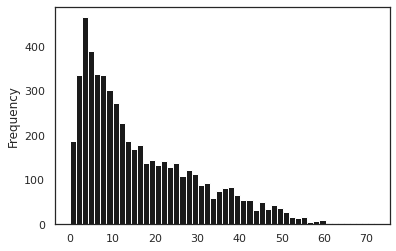

In [39]:
## plot histogram 
dfall['Education'].plot.hist(bins=50 ,color='k') 


<AxesSubplot:ylabel='Frequency'>

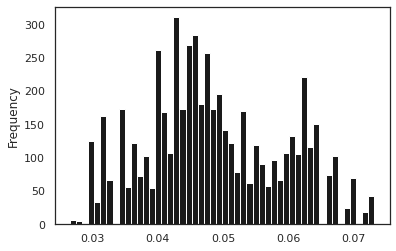

In [40]:
## plot histogram 
dfall['Ozone'].plot.hist(bins=50 ,color='k') 


<AxesSubplot:>

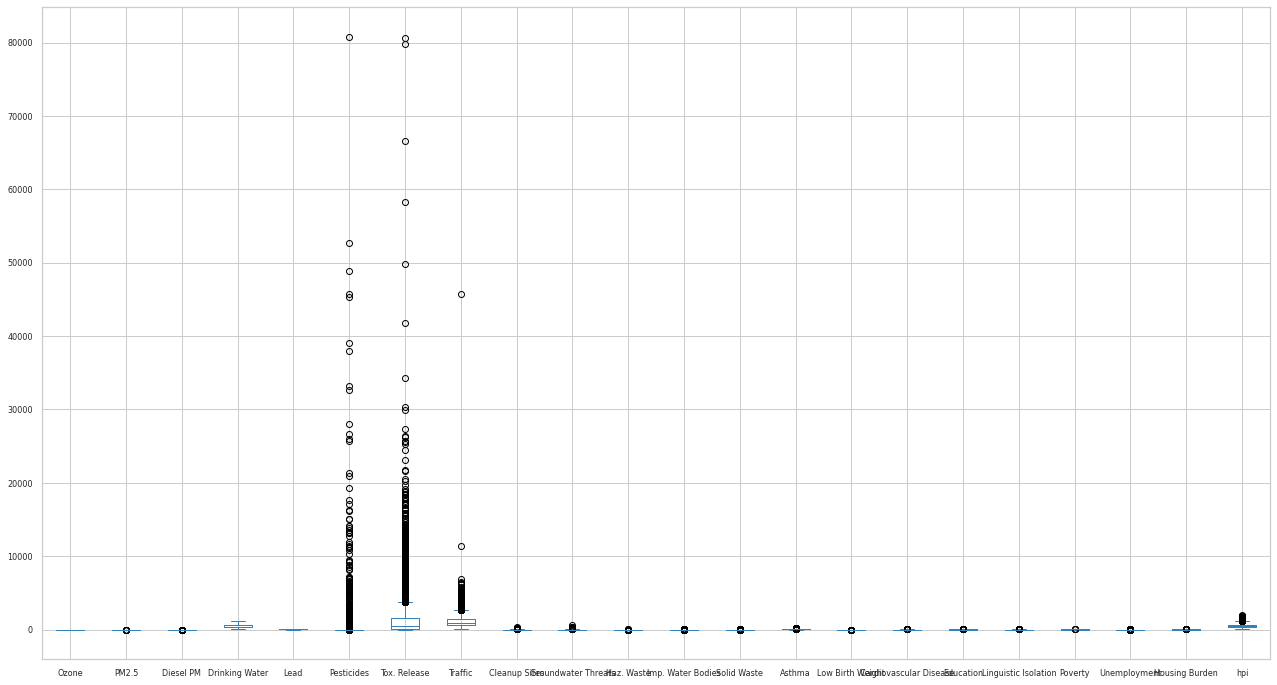

In [41]:
sns.set_style("whitegrid")
dfall.boxplot(
            figsize=(22,12),fontsize =8, color = "#3182bd")

#plt.savefig("boxplots.png", bbox_inches = 'tight',dpi=300)

The boxplots indicate the existence of outliers in all variables with a few of them recording extreme outliers: "Pesticides","Tox.Resease", "Trafic"

In [42]:
dfall.columns

Index(['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides',
       'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats',
       'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma',
       'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden',
       'hpi'],
      dtype='object')

In [43]:
boxplotlist =[ 'Ozone','PM2.5', 'Diesel PM', 'Drinking Water', 'Lead',
       'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden',
       'hpi']

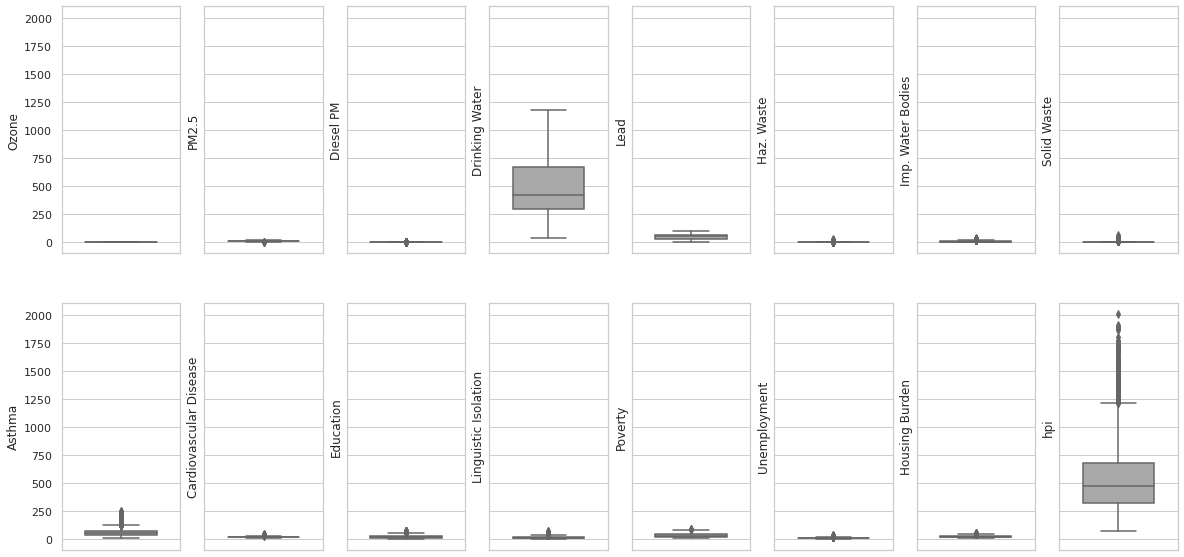

In [44]:
fig, ax = plt.subplots(2,8, figsize=(20, 10) ,sharey=True)
#move overall title up
#fig.subplots_adjust(top=.85)
#fig.suptitle('(A)Non-sequential removal')
#ax[0].set_title('Degree Centrality')
#ax[1].set_title('Betweeness Centrality')
#ax[2].set_title('Delta Centrality')

#specify axis labels
#for i in range(0,3):
   # ax[i].set(ylabel='Efficiency')
#ax[i].set(xlabel='Station removed')
ax = ax.flatten()

#ax[0].set(ylabel='Size of largest component')
for i in boxplotlist:
    sns.boxplot(y=i, data=dfall,width=0.6,ax=ax[boxplotlist.index(i)],color = "darkgrey")



In [45]:
dftest = dfall.copy()

In [46]:
# dftest[log]

### Try reducing the variables

In [47]:
drop= ['Ozone', 'Diesel PM', 'Lead', 'Pesticides',
       'Tox. Release', 'Cleanup Sites', 'Groundwater Threats',
       'Imp. Water Bodies']

In [48]:
dfall.drop(columns=drop, inplace=True)
dfall.head()

PM2.5  \
0                                  11.8841   
1                                  12.2516   
2                                  13.9661   
3                                  12.0661   
4                                  12.0902   

                            Drinking Water  \
0                                 389.8466   
1                                 787.9403   
2                                 788.3096   
3                                 805.5744   
4                                 787.9403   

                                   Traffic  \
0                                 856.3959   
1                               2,522.6223   
2                                 438.5941   
3                               3,455.2393   
4                               2,484.9657   

                                Haz. Waste  \
0                                   1.2700   
1                                  11.6200   
2                                   1.2050   
3                                   7.2800   
4                                   1.2200   

                               Solid Waste  \
0                                   9.2500   
1                                   4.8500   
2                                   7.0000   
3                                   4.2000   
4                                   0.2000   

                                    Asthma  \
0                                 105.8800   
1                                  76.1000   
2                                  89.2700   
3                                  64.7700   
4                                 129.2000   

                          Low Birth Weight  \
0                                   6.8800   
1                                   7.1100   
2                                   6.8300   
3                                   7.7700   
4                                   9.4800   

                    Cardiovascular Disease  \
0                                  20.2600   
1                                  20.8700   
2                                  14.1300   
3                                  12.9900   
4                                  26.4800   

                                 Education  \
0                                  46.4000   
1                                  52.2000   
2                                  52.4000   
3                                  31.6000   
4                                  44.8000   

                      Linguistic Isolation  \
0                                  29.7000   
1                                  17.1000   
2                                  22.4000   
3                                  20.1000   
4                                  12.4000   

                                   Poverty  \
0                                  73.2000   
1                                  62.6000   
2                                  72.2000   
3                                  51.5000   
4                                  73.5000   

                              Unemployment  \
0                                  19.8000   
1                                   6.4000   
2                                  16.3000   
3                                   4.5000   
4                                  15.6000   

                            Housing Burden  \
0                                  31.2000   
1                                  20.3000   
2                                  30.8000   
3                                  26.1000   
4                                  41.2000   

                                       hpi  
0                                 170.3200  
1                                 225.1300  
2                                 205.9600  
3                                 396.5200  
4                                 342.2300

### 5.2 Data preparation

#### 5.2.1 train-test split

In [49]:
# split the data in training and testing set
train_x, test_x, train_y, test_y = train_test_split(dfall.drop(['hpi'], axis = 1), dfall.hpi, random_state=random_state)

In [50]:
# TRAIN TEST SPLIT FOR VALIDATION!

# create the independent and dependent variables
X = dfall.drop(['hpi'], axis = 1)
y = dfall.hpi

print(X.shape)
print(y.shape)

# We apply train_test_split twice to obtain the three train, dev and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1024)


#print out the size of the different datasets created
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(5535, 13)
(5535,)
(3874, 13)
(830, 13)
(831, 13)


!!! taking the log???????????????????????????/

#### 5.2.2 standartisation

add here?

#### 5.2.3. additional: check for multicolinearity

Text(0.5, 1.0, 'Correlation Matrix')

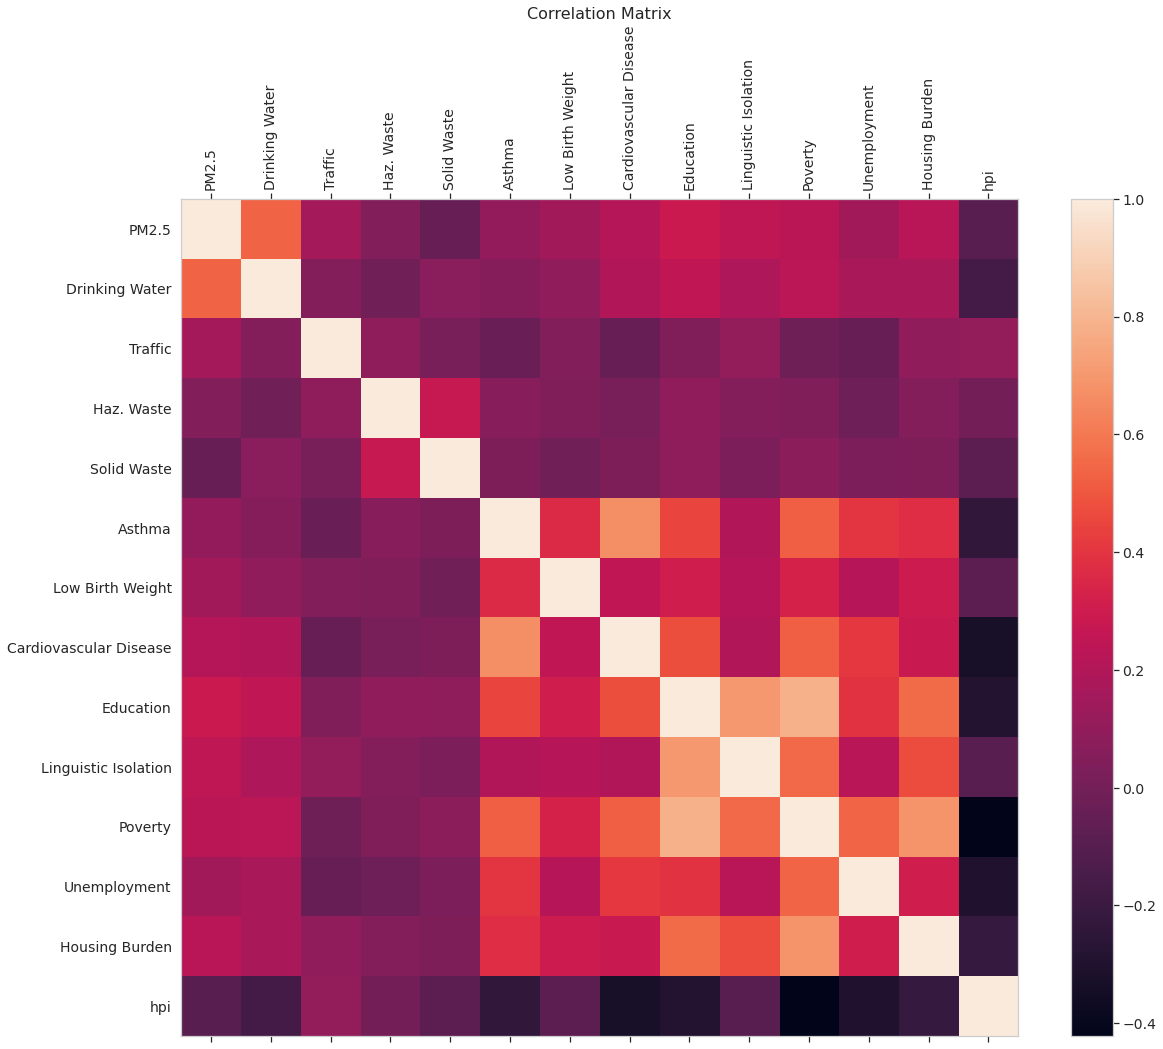

In [51]:
df = dfall
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [52]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [53]:
# using VIF on the bike_rental dataset

train_x_VIF = drop_column_using_vif_(train_x, thresh=5)
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

Max VIF: 4.347482908382459
The columns remaining after VIF selection are:
Index(['PM2.5', 'Drinking Water', 'Traffic', 'Haz. Waste', 'Solid Waste',
       'Asthma', 'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


NOTE: VIF drops NO variables!

### 5.3 In-depth Analysis

#### Linear regresssion (test)

In [54]:
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=train_y)

LinearRegression()

Now that we've created our fit, it's time to look at the structure of the model and how well it fits the data.

There are a number of ways to do this. In the first instance, as with any linear regression model, we want to get a grip on the coefficients and intercept of the model. Helpfully, these two functions are built into the LinearRegression object. **Consult the documentation and see if you can find out how to extract these.**

In [55]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": train_x_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  781.355790931919
                       var                                     coef
0                    PM2.5                                  -0.6240
1           Drinking Water                                  -0.0929
2                  Traffic                                   0.0335
3               Haz. Waste                                   2.8888
4              Solid Waste                                  -3.6654
5                   Asthma                                   0.7635
6         Low Birth Weight                                   7.2417
7   Cardiovascular Disease                                  -8.9224
8                Education                                   0.2989
9     Linguistic Isolation                                   6.4074
10                 Poverty                                  -8.8042
11            Unemployment                                  -3.4285
12          Housing Burden                                   2.0874


In [56]:
print('R2:')
lr.score(X=train_x_VIF, y=train_y)

R2:


0.2440022019456043

In [57]:
# select the same columns from test_x as train_x_VIF
test_x_VIF = test_x[train_x_VIF.columns] # select the VIF columns that the train date by using it as a selector

# using the model.score function to get the R2 on the testing data
lr.score(X=test_x_VIF, y=test_y)

0.21260401215716773

<AxesSubplot:title={'center':'Modal Coefficients'}>

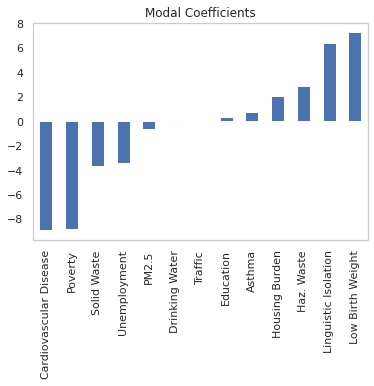

In [58]:
#checking the magnitude of coefficients

predictors = train_x_VIF.columns

coef = pd.Series(lr.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

#### Lasso regression 

In [59]:
# increase the max_iter to guarantee convergence
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True) # need to be normalised
# fit the model
lasso_model.fit(X=train_x, y=train_y) # dont need the VIF. lasso does it 

Lasso(max_iter=100000000.0, normalize=True)

In [60]:
lasso_model.score(X=train_x, y=train_y) # calculates the R sqr

0.13120295937760873

The lasso regresso has a Rsquared of 0.14. 
This model performs poorly.

We can check out the coefficients using the following code.

In [61]:
# print(lasso_model.coef_)
df_coef_lasso = pd.DataFrame({"var": train_x.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                       var                                     coef
0                    PM2.5                                  -0.0000
1           Drinking Water                                  -0.0000
2                  Traffic                                   0.0000
3               Haz. Waste                                   0.0000
4              Solid Waste                                  -0.0000
5                   Asthma                                  -0.0000
6         Low Birth Weight                                  -0.0000
7   Cardiovascular Disease                                  -0.5141
8                Education                                  -0.0000
9     Linguistic Isolation                                   0.0000
10                 Poverty                                  -3.5698
11            Unemployment                                  -0.0000
12          Housing Burden                                  -0.0000


We can apply the Lasso regression with a range of lambda parameters, and see how the coefficients change with the lambda value. The plot is called `LASSO Path`.

(-1.25, 4.25, -167.84855196753858, 112.57386249359847)

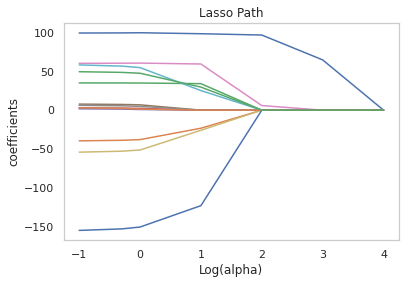

In [62]:
from itertools import cycle
from sklearn.linear_model import lasso_path

train_x_standard = train_x/train_x.std(axis=0)
list_alphas = [.1, .5, 1, 10, 100, 1000, 10000]

# alphas_lasso, coefs_lasso, _ = lasso_path(predictors_bike_rental, response_bike_rental, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(train_x_standard, train_y.values.reshape(-1),alphas = list_alphas, fit_intercept=False)
# print(alphas_lasso.shape)
# print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

In [63]:
from sklearn.linear_model import LassoCV # dont need to worry about splitting in test and train data here
import time

start_time = time.time()
lasso_cv = LassoCV(cv=20, alphas=list_alphas).fit(train_x, train_y)
fit_time = time.time() - start_time

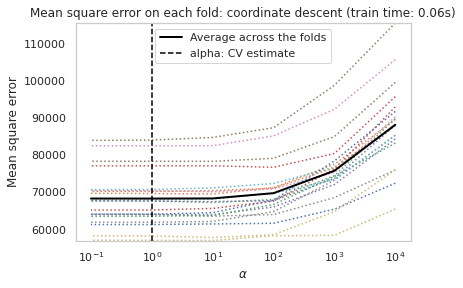

In [64]:
import matplotlib.pyplot as plt

ymin, ymax = np.min(lasso_cv.mse_path_), np.max(lasso_cv.mse_path_)
# lasso = model[-1]
plt.semilogx(lasso_cv.alphas_, lasso_cv.mse_path_, linestyle=":")
plt.plot(
    lasso_cv.alphas_,
    lasso_cv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso_cv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)

Print the **alphas_** values that have been compared.

In [65]:
print(lasso_cv.alphas_)

[1.e+04 1.e+03 1.e+02 1.e+01 1.e+00 5.e-01 1.e-01]


In [66]:
print(lasso_cv.alpha_)

1.0


Rerun the lasso model using the optimal alpha value:

In [67]:
# increase the max_iter to guarantee convergence
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True, alpha = lasso_cv.alpha_)
lasso_model.fit(X=train_x, y=train_y)
print(lasso_model.score(train_x, train_y))

0.13120295937760873


How does this model perform on the testing data?

In [68]:
print(lasso_model.score(test_x, test_y))

0.13666298152665146


In [69]:
# print(lasso_model.coef_)
df_coef_lassoNEW = pd.DataFrame({"var": train_x.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                       var                                     coef
0                    PM2.5                                  -0.0000
1           Drinking Water                                  -0.0000
2                  Traffic                                   0.0000
3               Haz. Waste                                   0.0000
4              Solid Waste                                  -0.0000
5                   Asthma                                  -0.0000
6         Low Birth Weight                                  -0.0000
7   Cardiovascular Disease                                  -0.5141
8                Education                                  -0.0000
9     Linguistic Isolation                                   0.0000
10                 Poverty                                  -3.5698
11            Unemployment                                  -0.0000
12          Housing Burden                                  -0.0000


NOTES:
Lasso: It arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero.[LINK](https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/)

add interpretation 

add hedonic regression?

add CART??


#### Random Forest

The random forest method[LINK] will be used in this section

The Random Forest Regresoor is an ensemble method, fitting multiple Decision Tree Classifiers on subsets of the dataset. The output is the average of these sub-trees. 


The advantages of this method are that:

    Easy to understand
    You can extract the structure by looking at individual trees
    Able to hand numerical and categorical data
    Reduces variance by combing diverse trees

The disadvantages:

    A large number of trees can make the algorithm too slow for real-time predictions in some cases


https://medium.com/pursuitnotes/random-forest-regression-in-5-steps-with-python-2463b7ae9af8

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://mljar.com/blog/visualize-tree-from-random-forest/

In [70]:
from sklearn.ensemble import RandomForestRegressor

#use the RandomForestRegressor with default hyperparameters
reg_random_forest = RandomForestRegressor(random_state=random_state)

#make sure to use the right train test (since I want to do validation as well)
reg_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

We can check the R2 score of this model.

In [71]:
print("R2 on the training data:")
print(reg_random_forest.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(reg_random_forest.score(X=X_test, y=y_test))

R2 on the training data:
0.9119363082001638
R2 on the testing data:
0.3397390194046961


NOTE: overfitting on the training data. Mediocre performance on the testing data

**HYPERPARAMETER TUNING**

We will compare two methods:
* Holdout validation (grid search)
* Cross validation (grid search)

The hyperparameters we will tune are: 
* ```n_estimators ```(default=100): The number of decision trees.

    Usually a higher number of trees improves the model's performance. However it is also slowing down the training process. 
        
      
* ```max_depth``` (default=None): The depth (splits) of each tree 
   
   Usually the deeper the tree the more information it captures about the data. However allowing maximum depth might result in overfitting. 
   
Before proceding however we will first use lineplots to get an estimate of the right values for the hyperparameters tested for with the two validation methods.
The code below is based on this [article](https://medium.com/@taplapinger/tuning-a-random-forest-classifier-1b252d1dde92)

NOTE: cross- validation is more robust, but is more computational intensive

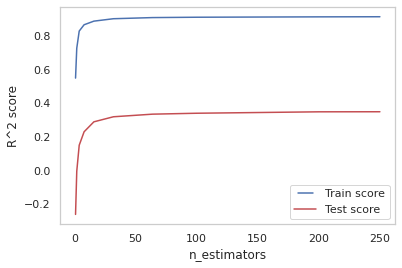

In [72]:

#Code adapted from: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d


n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 250]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestRegressor(random_state=random_state, n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)   
    
    score_train = rf.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = rf.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train score')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('n_estimators')
plt.show()

The plot above shows that the R2 score stabilises between approximatelly 150 and 200 estimators

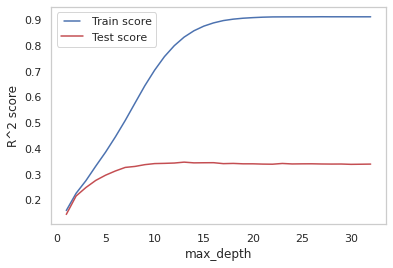

In [73]:
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestRegressor(random_state=random_state, max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)   
    
    score_train = rf.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = rf.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train score')
line2, = plt.plot(max_depths, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('max_depth')
plt.show()

The above plot indicates that the best R2 scores for the testing data occur between a tree depth of 10-15  and for the training data the R2 scores seem to stabilise after about a tree depth of 20.

The above plot indicates that the best R2 scores for the testing data occur between 10-15 trees and for the training data the R2 scores seem to stabilise after about 20 trees.

In [74]:
# set values for the hyperparameters
estimatorlist= [120,150,200,220]
depthlist= [10,13,15,18]

##### **Holdout validation**

Holdout validation will be used here, by specifing the 'cv' parameter (the cross validation splitting strategy) as an iterable yielding (train, test) as arrays of of indices. 

In [75]:
# merge training and validation data, as required by GridSearchCV
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])                       

# the index list of training and validation data in the merged dataset
# in X_train_val, the first n rows are from X_train and the remaining rows are from X_val. Here n=X_train.shape[0]
ind_train = list(range(X_train.shape[0]))
ind_val = list(range(X_train.shape[0], X_train_val.shape[0]))

In [76]:
%%time

from sklearn import model_selection

# set values for hyperparameters bearing in mind the results from the plots above
parameters = {'n_estimators': estimatorlist
             ,'max_depth': depthlist
             }

rf = RandomForestRegressor(random_state=random_state)

# cv: An iterable yielding (train, test) splits as arrays of indices.
clf = model_selection.GridSearchCV(rf, parameters, cv=[(ind_train, ind_val)])

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 15, 'n_estimators': 200}
The best score is: 
0.3494508553631468
CPU times: user 53 s, sys: 0 ns, total: 53 s
Wall time: 53 s


Now a final model with the tuned hypermarameters can be created:W

In [77]:
rf_final = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'], random_state=random_state)
rf_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)

In [78]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.878646485603662
The score on the development data:
0.3494508553631468


The Random Forest Regressor Model tuned with Holdout Validation has (very) sligly improved the performance.

and also slightly reduced the difference between the sore on the training and **development** data


##### **Cross-validation**

Cross-validation is considered more robust. 


In [79]:
# we merge the training and validation data and use the merged data for cross validation
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

In [80]:
%%time
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators': estimatorlist
              ,'max_depth':depthlist
             }
rf = RandomForestRegressor()

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 18, 'n_estimators': 120}
The best score is: 
0.378143396080436
CPU times: user 4min 5s, sys: 0 ns, total: 4min 5s
Wall time: 4min 5s


In [81]:
rf_final = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'], random_state=random_state)
rf_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, n_estimators=120, random_state=42)

In [82]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.9032452444671184
The score on the development data:
0.34462789692038165


The Random Forest Regressor Model tuned with Cross Validation return the same best values for the hyperparameter and therefore the same results for the performance of the model.

Lets also plot the **validation curve**(also based on cross validation) for each parameter 

In [ ]:
n_estimators_range = [10,20,30,40,50,70,100,150,200,250]

#n_estimators_range = estimatorlist
train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

In [ ]:
# plotting the validation curve for n_estimators
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
max_depth_range= depthlist

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="max_depth",
                                              param_range=max_depth_range,
                                              cv=5)

In [ ]:
# plotting the validation curve for max_depth

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"tree depth")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(max_depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(max_depth_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depth_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

It looks like the training and development scores do not change significantly with the number of trees, which means that the model is quite robust to this number of trees in the random forest.

You can pick up the point where the gap between training and cross-validation score reaches the minimum as the selected hyperparameter.

There is still significant variance in the model. 
methods to reduce variance: using more data or using simpler/smaller models. 

##### RF final estimate of performance 

Using the test set(that has not been used at any stage during the model training andn validation process) the final estimate of the RF model can be reported. 

In [ ]:
rf_final.score(X_test, y_test)

##### Indicative Tree Visualisation

Since Random forest is an essemble method, it does not really make sense to visualise the trees. However, visualising a few trees can give an indicative image and help at interpreting the results. 

In [ ]:
# code from https://github.com/UCL-DSS/random-forest-workshop/blob/main/Workshop.ipynb
#The best parameter value is: {'max_depth': 15, 'n_estimators': 200}

from sklearn import tree

import numpy as np
a = np.array(y_test.unique())
a = a.astype('<U10')
a

#visulise the first 2 trees
for x in range (0, 2):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=800)
    tree.plot_tree(rf_final.estimators_[x],max_depth=3, fontsize=2,
                   feature_names = X.columns, 
                   class_names = a,
                   filled = True)

##### Interpretation: permutation feature importance

Using the rfpimp package, the importance of each variable can be computed. For this the testing set needs to be used (not used for model training) to avoid biased results. 

In [ ]:
#! pip install rfpimp

In [ ]:
import rfpimp
imp = rfpimp.importances(rf_final, X_test, y_test) # permutation
print(imp)
#viz = rfpimp.plot_importances(imp)
#viz.view()

In [ ]:
imp

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 7))

ax = sns.barplot( x="Importance",
                  y=imp.index.values, 
                 #hue="room_type",
                  data=imp,
                  order = imp.index.values,
                  palette="crest_r")

#plt.xlabel(None)
#lt.ylabel(None)

ax.set_xlabel("Importance", 
             fontsize = 12,
             labelpad = 10)
ax.set_ylabel("Features",
             fontsize = 12,
             labelpad = 20)
ax.set_title("Feature importances from the Random Forest Regressor", size=14, pad = 20)

#plt.savefig("Percentage of Women with higher education2.png", bbox_inches = 'tight', dpi=300)

### viz test
https://linuxtut.com/en/a135cc5a7cd1bbadfc2f/
https://nycdatascience.com/blog/student-works/house-price-prediction-using-machine-learning-techniques/


In [84]:
X_val

PM2.5  \
1142                                   8.1028   
1936                                  11.9948   
5257                                   9.7418   
3772                                   8.1604   
1054                                  12.2187   
...                                       ...   
2585                                   8.1761   
2875                                  11.6329   
2972                                  13.5422   
5369                                   9.2695   
234                                   12.0061   

                               Drinking Water  \
1142                                 327.1018   
1936                                 471.4108   
5257                                 312.8607   
3772                                 260.7751   
1054                                 726.6382   
...                                       ...   
2585                                 289.7986   
2875                                 481.1926   
2972                                 733.9469   
5369                                 177.3831   
234                                  369.4021   

                                      Traffic  \
1142                               1,106.4815   
1936                                 701.8299   
5257                               1,792.8506   
3772                               1,035.4715   
1054                                 969.0943   
...                                       ...   
2585                                 517.2810   
2875                                 825.0779   
2972                                 765.1928   
5369                                 869.0378   
234                                1,087.0221   

                                   Haz. Waste  \
1142                                   1.2600   
1936                                   0.1550   
5257                                   0.1850   
3772                                   0.2000   
1054                                   0.1700   
...                                       ...   
2585                                   0.2800   
2875                                   2.9900   
2972                                   0.1450   
5369                                   0.1750   
234                                    0.4450   

                                  Solid Waste  \
1142                                   2.5000   
1936                                   0.0000   
5257                                   0.0000   
3772                                   0.2000   
1054                                   0.0000   
...                                       ...   
2585                                   0.0000   
2875                                   1.1000   
2972                                   0.0000   
5369                                   0.0000   
234                                    9.0000   

                                       Asthma  \
1142                                  31.2200   
1936                                  45.7800   
5257                                  25.8800   
3772                                  39.4500   
1054                                  84.1400   
...                                       ...   
2585                                  79.7300   
2875                                  24.7500   
2972                                 106.5700   
5369                                  19.2900   
234                                   67.3400   

                             Low Birth Weight  \
1142                                   6.7000   
1936                                   6.7500   
5257                                   3.4300   
3772                                   5.6000   
1054                                   6.2000   
...                                       ...   
2585                                   5.9100   
2875                                   8.5200   
2972                                   3.7600   
5369            

In [85]:
# function to draw the accuracy of the prediction result
def predict_visualizer(valid, valid_predict, test, test_predict, title):
    valid_array = np.array(valid)
    test_array = np.array(test)
    va_pred_array = np.array(valid_predict)
    ts_pred_array = np.array(test_predict)
    y_values = np.concatenate([valid_array, va_pred_array]).flatten()
    ymin, ymax = np.amin(y_values), np.amax(y_values)
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(valid_array, va_pred_array, label='valid', color='aqua', alpha=0.4)
    plt.scatter(test_array, ts_pred_array, label='test', color='tomato', alpha=0.4)
    plt.plot([ymin, ymax], [ymin, ymax])
    plt.xlabel('test', fontsize=24)
    plt.ylabel('predict', fontsize=24)
    plt.title(f'{title}-Test-Predict Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.legend()
    plt.show()

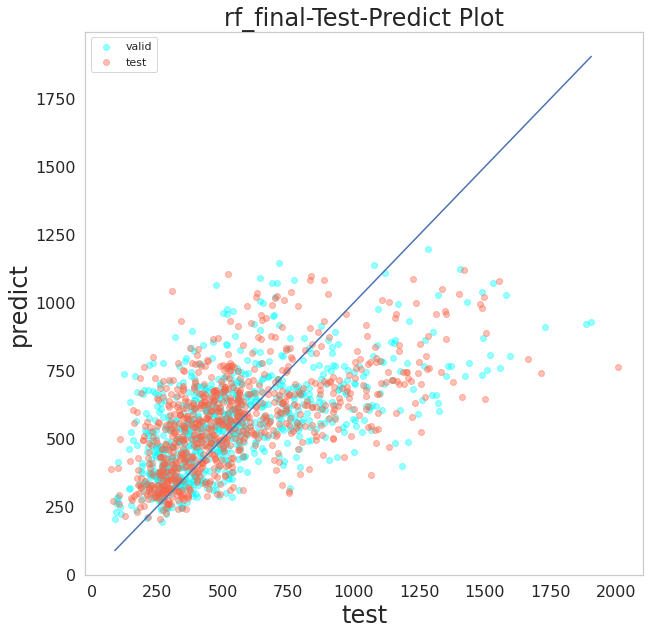

In [94]:
from sklearn.metrics import mean_squared_error

y_pred = rf_final.predict(X_val)
y_pred_test = rf_final.predict(X_test)
#print('='*20)
#print('RandomForestClassifier')
#print(f'valid_RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}')
#print(f'test_RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}')
print(f'valid_R2: {rf_final.score(X_val, y_val)}') 
print(f'test_R2: {rf_final.score(X_test, y_test)}')
predict_visualizer(y_val, y_pred, y_test, y_pred_test, 'rf_final')

In [96]:
# function to visualise the accuracy of the prediction results
def val_vs_predict_plot(yval, yval_predict, ytest, ytest_predict, title):
    yval_array = np.array(yval)
    ytest_array = np.array(ytest)
    yval_predict_array = np.array(yval_predict)
    ytest_predict_array = np.array(ytest_predict)
    y_values = np.concatenate([yval_array, yval_predict_array]).flatten()
    ymin, ymax = np.amin(y_values), np.amax(y_values)
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(yval_array, yval_predict_array, label='validation set', color='blue', alpha=0.4)
    plt.scatter(ytest_array, ytest_predict_array, label='test set', color='tomato', alpha=0.4)
    plt.plot([ymin, ymax], [ymin, ymax])
    plt.xlabel('actual values', fontsize=24)
    plt.ylabel('predicted values', fontsize=24)
    plt.title(f'{title}-Validation-Prediction Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.legend()
    plt.show()

valid_R2: 0.34462789692038165
test_R2: 0.3477260282639326


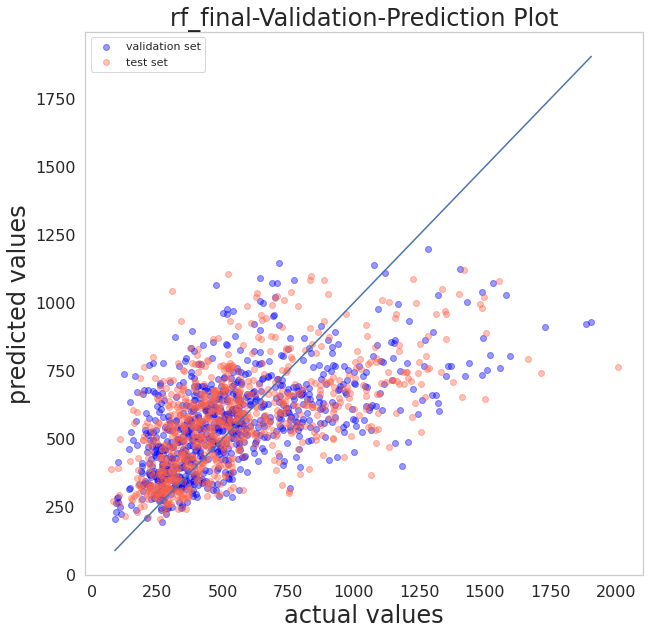

In [97]:
from sklearn.metrics import mean_squared_error

y_pred_val = rf_final.predict(X_val)
y_pred_test = rf_final.predict(X_test)
#print('='*20)
#print('RandomForestClassifier')
#print(f'valid_RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}')
#print(f'test_RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}')
print(f'valid_R2: {rf_final.score(X_val, y_val)}') 
print(f'test_R2: {rf_final.score(X_test, y_test)}')
val_vs_predict_plot(y_val, y_pred_val, y_test, y_pred_test, 'rf_final')

#### GBDT and XGBoost

A GBDT (Gradient Boosting Decision Tree) model will be used and compared to the previous models. 

The main difference to The random forest, is that in this ensemble learning the models are trained sequentially using the results of previous models as an input to the next(by assigning lower weight to correctly predicted outcomes and higher weight to the wrongly predicted outcomes) [LINK](https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663)

The [XGBoost](https://xgboost.readthedocs.io/en/stable/parameter.html) package will be used for this

In [84]:
# ! pip install XGBoost

In [202]:
import xgboost as xgb

#create the XGB boost model with default hyperparameters
xgb_model = xgb.XGBRegressor(random_state = random_state)

#fit the model the training set
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Compare the perfomance of the XGBmodel on the training and testing set:

In [196]:
print("R2 on the training data:")
print(xgb_model.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(xgb_model.score(X=X_test, y=y_test))

R2 on the training data:
0.9488077814405709
R2 on the testing data:
0.2749023295284797


The XGB model seems to perform better than the previous models on the testing set, but this uncalibrated model does not perform well on the testing data

**HYPERPARAMETER TUNING**

Similarly to the above, two methods will be compared:
* Holdout validation (grid search)
* Cross validation (grid search)

The hyperparameters we will tune are: 
* ```n_estimators ```(default=100): The number of decision trees.

    Usually a higher number of trees improves the model's performance. However it is also slowing down the training process. 
        
      
* ```max_depth``` (default=6): The depth (splits) of each tree 
   
   Usually the deeper the tree the more information it captures about the data. However allowing maximum depth might result in overfitting. 
   
* ```learning_rate``` (default=0.3): 

* ```colsample_bytree``` (default=1): 


Before proceding however we will first use lineplots to get an estimate of the right values for the hyperparameters tested for with the two validation methods.
The code below is based on this [article](https://medium.com/@taplapinger/tuning-a-random-forest-classifier-1b252d1dde92)

NOTE: cross- validation is more robust, but is more computational intensive

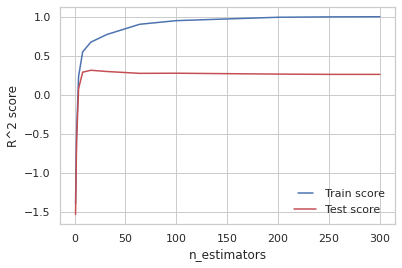

In [224]:

#Code adapted from: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d


n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 250,300]
train_results = []
test_results = []

for estimator in n_estimators:
    xr = xgb.XGBRegressor(random_state=random_state, n_estimators=estimator, n_jobs=-1)
    xr.fit(X_train, y_train)   
    
    score_train = xr.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = xr.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train score')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('n_estimators')
plt.show()

The plot above shows that the R2 score stabilises between approximatelly 150 and 200 estimators

In [212]:
max_depths = [1,2,3,5,10,15,30,35]

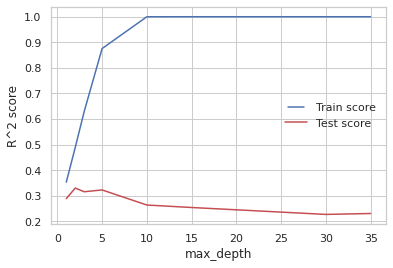

In [213]:
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

#max_depths = int(np.linspace(1, 32, 32, endpoint=True))


train_results = []
test_results = []

for max_depth in max_depths:
    xr = xgb.XGBRegressor(random_state=random_state, max_depth=max_depth, n_jobs=-1)
    xr.fit(X_train, y_train)   
    
    score_train = xr.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = xr.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train score')
line2, = plt.plot(max_depths, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('max_depth')
plt.show()

The above plot indicates that the best R2 scores for the testing data occur at a max depth value of 3-5 trees and for the training data the R2 scores seem to stabilise after about the max depth value of 10.

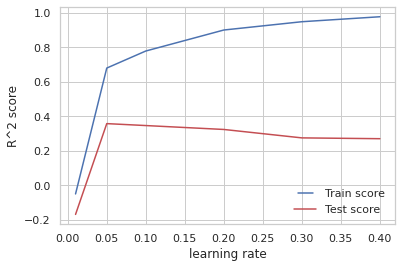

In [219]:
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

#max_depths = int(np.linspace(1, 32, 32, endpoint=True))
learning_rates = [0.01,0.05,0.1,0.2,0.3,0.4]

train_results = []
test_results = []

for learning_rate in learning_rates:
    xr = xgb.XGBRegressor(random_state=random_state, learning_rate=learning_rate, n_jobs=-1)
    xr.fit(X_train, y_train)   
    
    score_train = xr.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = xr.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
lcine1, = plt.plot(learning_rates, train_results, 'b', label='Train score')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('learning rate')
plt.show()

The above plot indicates that the best R2 scores for the testing data occur at a learning rate of around 0.05 and for the training data the R2 scores seem to continuously increase

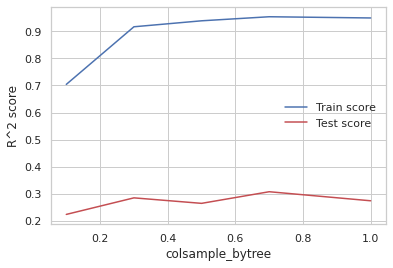

In [222]:
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

#max_depths = int(np.linspace(1, 32, 32, endpoint=True))
colsamples = [0.1,0.3,0.5,0.7,1]

train_results = []
test_results = []

for colsample in colsamples:
    xr = xgb.XGBRegressor(random_state=random_state, colsample_bytree=colsample, n_jobs=-1)
    xr.fit(X_train, y_train)   
    
    score_train = xr.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = xr.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
lcine1, = plt.plot(colsamples, train_results, 'b', label='Train score')
line2, = plt.plot(colsamples, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('colsample_bytree')
plt.show()

In [229]:
# set values for the hyperparameters
estimatorlist= [10,15,20,100,200,250]
depthlist= [2,5,10,12]
learningratelist = [0.01, 0.05, 0.1]
colsampletreelist = [0.3, 0.7]


##### **Holdout validation**

Holdout validation will be used here, by specifing the 'cv' parameter (the cross validation splitting strategy) as an iterable yielding (train, test) as arrays of of indices. 

In [230]:
# merge training and validation data, as required by GridSearchCV
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])                       

# the index list of training and validation data in the merged dataset
# in X_train_val, the first n rows are from X_train and the remaining rows are from X_val. Here n=X_train.shape[0]
ind_train = list(range(X_train.shape[0]))
ind_val = list(range(X_train.shape[0], X_train_val.shape[0]))

In [231]:
%%time

from sklearn import model_selection

# set values for hyperparameters bearing in mind the results from the plots above
parameters = {'n_estimators': estimatorlist
             ,'max_depth': depthlist
              ,'learning_rate': learningratelist
              ,'colsample_bytree': colsampletreelist
             }

xr = xgb.XGBRegressor(random_state=random_state)

# cv: An iterable yielding (train, test) splits as arrays of indices.
clf = model_selection.GridSearchCV(xr, parameters, cv=[(ind_train, ind_val)])

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 250}
The best score is: 
0.39213674485601613
CPU times: user 7min, sys: 1.13 s, total: 7min 1s
Wall time: 1min 5s


Now a final model with the tuned hypermarameters can be created:W

In [232]:
xgb_final = xgb.XGBRegressor(n_estimators=clf.best_params_['n_estimators'],
                             learning_rate=clf.best_params_['learning_rate'], 
                             max_depth=clf.best_params_['max_depth'],
                             colsample_bytree=clf.best_params_['colsample_bytree'], 
                             random_state=random_state)
xgb_final.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=12,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [233]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.878646485603662
The score on the development data:
0.3494508553631468


##### **Cross-validation**


In [234]:
# we merge the training and validation data and use the merged data for cross validation
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

In [235]:
%%time

from sklearn import model_selection

# set values for hyperparameters bearing in mind the results from the plots above
parameters = {'n_estimators':estimatorlist
              ,'max_depth':depthlist
              ,'learning_rate': learningratelist
              ,'colsample_bytree': colsampletreelist
             }
xgb_model = xgb.XGBRegressor(random_state = random_state)

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(xgb_model, parameters)

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 250}
The best score is: 
0.40038271155442484
CPU times: user 35min 33s, sys: 4.78 s, total: 35min 38s
Wall time: 5min 31s


Now a final model with the tuned hypermarameters can be created:W

In [236]:
xgb_final = xgb.XGBRegressor(n_estimators=clf.best_params_['n_estimators'],
                             learning_rate=clf.best_params_['learning_rate'], 
                             max_depth=clf.best_params_['max_depth'],
                             colsample_bytree=clf.best_params_['colsample_bytree'], 
                             random_state=random_state)

xgb_final.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [237]:
print('The score on the training data:')
print(xgb_final.score(X_train, y_train))
print('The score on the development data:')
print(xgb_final.score(X_val, y_val))

The score on the training data:
0.9908221715983989
The score on the development data:
0.3877373384537832


Lets also plot the **validation curve**(also based on cross validation) for each parameter 

In [238]:
n_estimators_range = [10,20,30,40,50,70,100,150,200,250]

#n_estimators_range = estimatorlist
train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

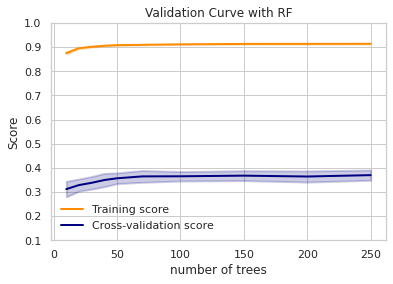

In [239]:
plt.figure(figsize=(6, 7))
# plotting the validation curve for n_estimators
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [241]:
max_depth_range= depthlist

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="max_depth",
                                              param_range=max_depth_range,
                                              cv=5)

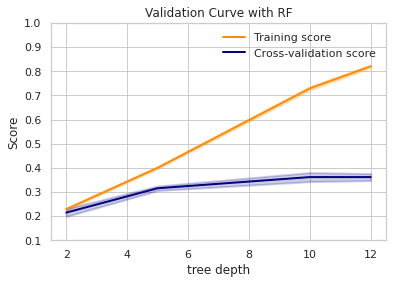

In [242]:
# plotting the validation curve for max_depth

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"tree depth")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(max_depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(max_depth_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depth_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

##### **XGB final estimate of performance**

Using the test set(that has not been used at any stage during the model training andn validation process) the final estimate of the RF model can be reported. 

In [243]:
xgb_final.score(X_test, y_test)

0.3601645631759002

## Model comparison

Lets compare the performance of the models

In [245]:
# create a list of models
list_name_models = ['LR_VIF', 'LR_LASSO', 'RF', 'GBDT']
# use the models from above
list_reg_models = [lr, lasso_model, rf_final, xgb_final]

dict_models = dict()

# Element of dict_models: {'LR_VIF': [train_R2, test_R2]}

# Example
# data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
# pd.DataFrame.from_dict(data, orient='index')
#        0  1  2  3
# row_1  3  2  1  0
# row_2  a  b  c  d

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y), model.score(train_x_VIF, train_y) - model.score(test_x_VIF, test_y)]
    elif name == 'LR_LASSO':
        dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y), model.score(train_x, train_y) - model.score(test_x, test_y)]
    else:
        dict_models[name] = [model.score(X_train, y_train), model.score(X_test, y_test),model.score(X_train, y_train) - model.score(X_test, y_test)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data', 'R2_diff'])
df_models
# you can then export df_models as a csv file and use it in MS Excel or Word

R2_train_data  \
LR_VIF                                     0.2440   
LR_LASSO                                   0.1312   
RF                                         0.8786   
GBDT                                       0.9908   

                                     R2_test_data  \
LR_VIF                                     0.2126   
LR_LASSO                                   0.1367   
RF                                         0.3491   
GBDT                                       0.3602   

                                          R2_diff  
LR_VIF                                     0.0314  
LR_LASSO                                  -0.0055  
RF                                         0.5296  
GBDT                                       0.6307

interpreation of model comparison(in results?)

##### **Interpretation: permutation feature importance**

Using the rfpimp package, the importance of each variable can be computed. For this the testing set needs to be used (not used for model training) to avoid biased results. 

In [247]:
#import rfpimp
impx = rfpimp.importances(xgb_final, X_test, y_test) # permutation
print(impx)
#viz = rfpimp.plot_importances(imp)
#viz.view()

                                                     Importance
Feature                                                        
Poverty                                                  0.3180
Cardiovascular Disease                                   0.1802
PM2.5                                                    0.1008
Drinking Water                                           0.0526
Asthma                                                   0.0309
Education                                                0.0297
Solid Waste                                              0.0137
Traffic                                                  0.0137
Linguistic Isolation                                     0.0118
Unemployment                                             0.0064
Housing Burden                                           0.0030
Haz. Waste                                               0.0014
Low Birth Weight                                        -0.0047


In [248]:
impx

Importance
Feature                                                        
Poverty                                                  0.3180
Cardiovascular Disease                                   0.1802
PM2.5                                                    0.1008
Drinking Water                                           0.0526
Asthma                                                   0.0309
Education                                                0.0297
Solid Waste                                              0.0137
Traffic                                                  0.0137
Linguistic Isolation                                     0.0118
Unemployment                                             0.0064
Housing Burden                                           0.0030
Haz. Waste                                               0.0014
Low Birth Weight                                        -0.0047

Text(0.5, 1.0, 'Feature importances from the XGB Regressor')

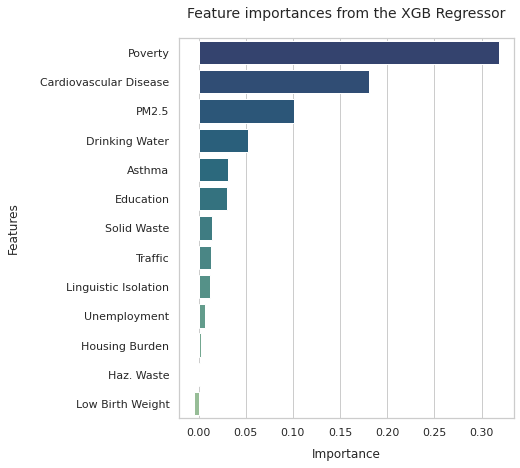

In [249]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 7))

ax = sns.barplot( x="Importance",
                  y=impx.index.values, 
                 #hue="room_type",
                  data=impx,
                  order = impx.index.values,
                  palette="crest_r")

#plt.xlabel(None)
#lt.ylabel(None)

ax.set_xlabel("Importance", 
             fontsize = 12,
             labelpad = 10)
ax.set_ylabel("Features",
             fontsize = 12,
             labelpad = 20)
ax.set_title("Feature importances from the XGB Regressor", size=14, pad = 20)

#plt.savefig("Percentage of Women with higher education2.png", bbox_inches = 'tight', dpi=300)

add the two plots next to each other!

## PCA

### why this scaler?

In [318]:

# the name list of independent variables
list_var_X = dfall.columns.tolist()
list_var_X.remove('hpi')

y=y = dfall.hpi

In [281]:
# standardisation of the X. This is essential for PCA.
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [282]:
from sklearn.decomposition import PCA
rand_st_int = random_state
pca = PCA(random_state=rand_st_int)
# fit the components
X_new_components = pca.fit_transform(X)

In [283]:
print(list_var_X)
print(len(list_var_X))

['PM2.5', 'Drinking Water', 'Traffic', 'Haz. Waste', 'Solid Waste', 'Asthma', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']
13


In [284]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X)
df_PrincipleComp

PM2.5  \
0                                    0.2024   
1                                    0.5280   
2                                   -0.2608   
3                                   -0.2725   
4                                    0.0668   
5                                   -0.1072   
6                                    0.1748   
7                                   -0.0083   
8                                   -0.0585   
9                                   -0.6950   
10                                  -0.0053   
11                                  -0.0560   
12                                   0.0421   

                             Drinking Water  \
0                                    0.1825   
1                                    0.4980   
2                                   -0.2470   
3                                   -0.3976   
4                                   -0.1856   
5                                   -0.0733   
6                                   -0.1223   
7                                   -0.0137   
8                                   -0.0555   
9                                    0.6470   
10                                   0.1508   
11                                  -0.0119   
12                                  -0.0078   

                                    Traffic  \
0                                    0.0286   
1                                    0.3899   
2                                    0.1324   
3                                    0.2179   
4                                    0.6726   
5                                    0.5214   
6                                   -0.1892   
7                                    0.0178   
8                                    0.0713   
9                                    0.1065   
10                                  -0.0348   
11                                  -0.0555   
12                                   0.0325   

                                 Haz. Waste  \
0                                    0.0457   
1                                    0.1441   
2                                    0.6519   
3                                   -0.1976   
4                                    0.1322   
5                                   -0.1795   
6                                    0.6095   
7                                    0.2605   
8                                   -0.0170   
9                                    0.1471   
10                                  -0.0245   
11                                   0.0288   
12                                   0.0280   

                                Solid Waste  \
0                                    0.0430   
1                                    0.0922   
2                                    0.6259   
3                                   -0.3089   
4                                   -0.2589   
5                                    0.0736   
6                                   -0.5907   
7                                   -0.1726   
8                                    0.0167   
9                                   -0.2192   
10                                   0.0271   
11                                   0.0463   
12                                   0.0010   

                                     Asthma  \
0                                    0.3230   
1                                   -0.3616   
2                                    0.0121   
3                                   -0.2372   
4                                    0.2756   
5                                    0.0763   
6                                    0.0919   
7                                   -0.2686   
8                                   -0.1011   
9                                   -0.0287   
10                                   0.6916   
11                                  -0.2381   
12                                   0.0020   

                           Low Birth Weight  \
0                                    

In [255]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.3276659  0.11252896 0.09964096 0.08715433 0.07598515 0.06102716
 0.05565864 0.05048692 0.04238116 0.03292971 0.02359435 0.01967689
 0.01126987]


You can get the eigen values of the PCA. The ```explained_variance_``` gives the actual eigen values.

In [256]:
# explained variance is the eigenvalue
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[4.26042647 1.4631408  1.29556653 1.13321098 0.98798548 0.7934964
 0.72369307 0.65644857 0.55105461 0.42816363 0.30678203 0.25584578
 0.14653476]


 explained variance is the eigenvalue
NOTE: the two lists above are proportional:
For example the first value in explained_variance(5.198..) is the absolute value of the variance explained by the first value and the first value in explained_varance_ratio_(0.492..) is the  explained_variance value (5.198..) devided by total variance

One of the use of PCA is to visualise high-dimensional data. Here we can visualise the first two components, using the house price as the colour.(MEDV)

Text(0, 0.5, 'PC2')

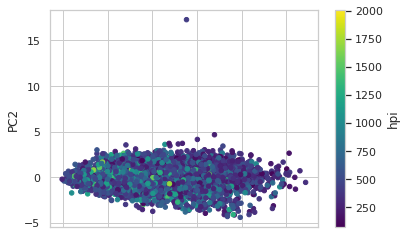

In [257]:
df_X_new_coord = pd.DataFrame(X_new_components)
# adding the y variable to df_X_new_coord
df_X_new_coord = df_X_new_coord.assign(hpi = df.hpi)
ax = df_X_new_coord.plot.scatter(x = 0, y = 1, c = "hpi", colormap="viridis")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

In [103]:
# as PC1 increases MEDV decreases
# as PC2 increases price increases

# this is one way to 'validate' the PCA results and interpret them 

# massive overlap!

try this plot


https://datascienceplus.com/principal-component-analysis-pca-with-python/

https://plotly.com/python/pca-visualization/

https://www.reneshbedre.com/blog/principal-component-analysis.html

### Selecting the number of components

In the lecture, we talked about three methods to select the number of PCA components.

1. Using two or three dimensions for visualisation;
2. Retaining components with eigenvalues larger than one;
3. Using Scree plot to locate a point that occurs just before the Scree plot flattens out.

Following the Rule 2, we would choose three components from PCA, as they have eigenvalues larger than one.

How about Rule 3? Let's try the Scree plot.

<AxesSubplot:xlabel='PC'>

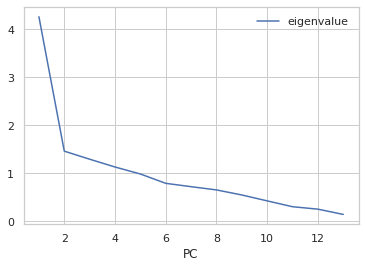

In [258]:
df1 = pd.DataFrame({'eigenvalue':pca.explained_variance_,
             'PC':list(range(1, pca.n_components_ + 1))})
df1.plot.line(x = 'PC', y = 'eigenvalue')

PC=3 ? (fix the x scale)
PC=7 (eigenvalues>1)

NOTE
x: Number of Principal Componets
y: explained variance of the PC analysis(or eigenvalues) 

Always explain how and why I choose n number of components for my analysis

One observation is that ```PC=2``` is a transition point, as the plot decreases very quickly before this point and then becomes very flat after it. Therefore, two components should be chosen.

In practice, you can decide which rule to use.

In [259]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X)
df_PrincipleComp

PM2.5  \
0                                    0.2024   
1                                    0.5280   
2                                   -0.2608   
3                                   -0.2725   
4                                    0.0668   
5                                   -0.1072   
6                                    0.1748   
7                                   -0.0083   
8                                   -0.0585   
9                                   -0.6950   
10                                  -0.0053   
11                                  -0.0560   
12                                   0.0421   

                             Drinking Water  \
0                                    0.1825   
1                                    0.4980   
2                                   -0.2470   
3                                   -0.3976   
4                                   -0.1856   
5                                   -0.0733   
6                                   -0.1223   
7                                   -0.0137   
8                                   -0.0555   
9                                    0.6470   
10                                   0.1508   
11                                  -0.0119   
12                                  -0.0078   

                                    Traffic  \
0                                    0.0286   
1                                    0.3899   
2                                    0.1324   
3                                    0.2179   
4                                    0.6726   
5                                    0.5214   
6                                   -0.1892   
7                                    0.0178   
8                                    0.0713   
9                                    0.1065   
10                                  -0.0348   
11                                  -0.0555   
12                                   0.0325   

                                 Haz. Waste  \
0                                    0.0457   
1                                    0.1441   
2                                    0.6519   
3                                   -0.1976   
4                                    0.1322   
5                                   -0.1795   
6                                    0.6095   
7                                    0.2605   
8                                   -0.0170   
9                                    0.1471   
10                                  -0.0245   
11                                   0.0288   
12                                   0.0280   

                                Solid Waste  \
0                                    0.0430   
1                                    0.0922   
2                                    0.6259   
3                                   -0.3089   
4                                   -0.2589   
5                                    0.0736   
6                                   -0.5907   
7                                   -0.1726   
8                                    0.0167   
9                                   -0.2192   
10                                   0.0271   
11                                   0.0463   
12                                   0.0010   

                                     Asthma  \
0                                    0.3230   
1                                   -0.3616   
2                                    0.0121   
3                                   -0.2372   
4                                    0.2756   
5                                    0.0763   
6                                    0.0919   
7                                   -0.2686   
8                                   -0.1011   
9                                   -0.0287   
10                                   0.6916   
11                                  -0.2381   
12                                   0.0020   

                           Low Birth Weight  \
0                                    

<AxesSubplot:>

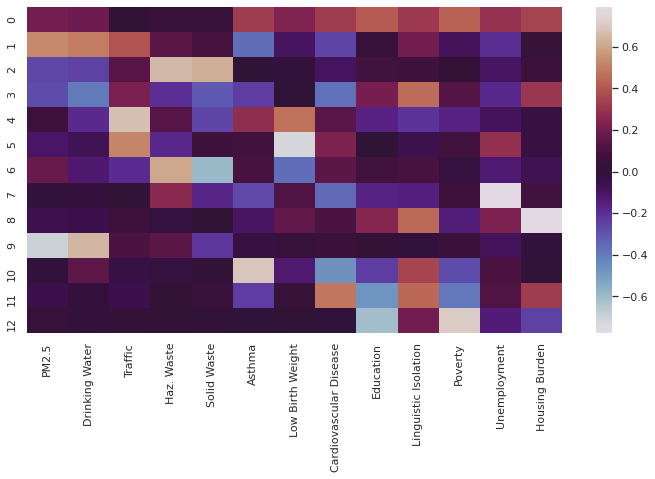

In [261]:
map = pd.DataFrame(pca.components_,columns=df_PrincipleComp.columns )
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.[LINK](https://datascienceplus.com/principal-component-analysis-pca-with-python/)

#### check performance of linear regression after PCA

In [262]:
X_new_components.shape

(5535, 13)

In [306]:
# create a new X dataset including three PCs (subset with the first three principal components)
X_two_pc = X_new_components[:,[0,1,2,3]]
#X_three_pc = X_new_components[:,[0,1,2,3,4,5,6]]

In [307]:
X_two_pc

array([[ 6.15455261, -1.02268982,  1.45103837,  0.03415925],
       [ 4.41425853,  2.43926347,  5.8389079 , -1.89064606],
       [ 5.62075863,  0.76948994,  0.45325802, -0.44802378],
       ...,
       [-3.97224726, -0.40887181, -0.05895522,  0.75184403],
       [-3.71458283, -0.44343405, -0.20221466,  0.44231747],
       [-4.05415118, -0.21823982,  0.20296813,  0.32301545]])

In [319]:
# split the traing and testing dataset
split_rand_state = random_state
train_X_pc, test_X_pc, train_y_pc, test_y_pc = train_test_split(X_two_pc, y, random_state=split_rand_state)

In [320]:
# train a new model
lr_pc = LinearRegression()
lr_pc.fit(X=train_X_pc, y=train_y_pc)

LinearRegression()

In [321]:
# measure the model performance
lr_pc.score(X=test_X_pc, y=test_y_pc)

0.15717537277845872

Performance even worse! no linear relationship??

In [322]:
X_new = pd.DataFrame(X_three_pc)
X_new

0  \
0                                      6.1546   
1                                      4.4143   
2                                      5.6208   
3                                      3.0488   
4                                      6.8696   
...                                       ...   
5530                                  -3.8804   
5531                                  -3.7344   
5532                                  -3.9722   
5533                                  -3.7146   
5534                                  -4.0542   

                                            1  
0                                     -1.0227  
1                                      2.4393  
2                                      0.7695  
3                                      2.9863  
4                                     -0.5671  
...                                       ...  
5530                                  -0.4318  
5531                                   0.0790  
5532                                  -0.4089  
5533                                  -0.4434  
5534                                  -0.2182  

[5535 rows x 2 columns]

In [323]:
# adding the y variable to df_X_new_coord
df_new = X_new.assign(hpi = df.hpi)

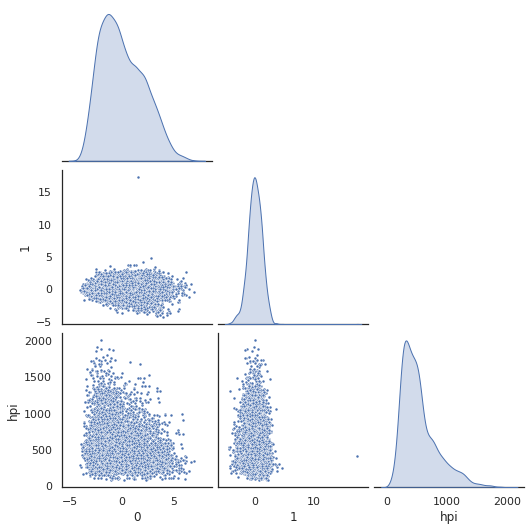

In [324]:


# using a quick plot to visualise the distribution of the variables
sns.set(style="white")
sns.pairplot(data=df_new, markers=".", diag_kind='kde', corner=True)



In [292]:
### Kernel PCA

In [293]:
from sklearn.decomposition import KernelPCA

In [294]:
# different kernels can be used
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.05, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.05, coef0=1, fit_inverse_transform=True)

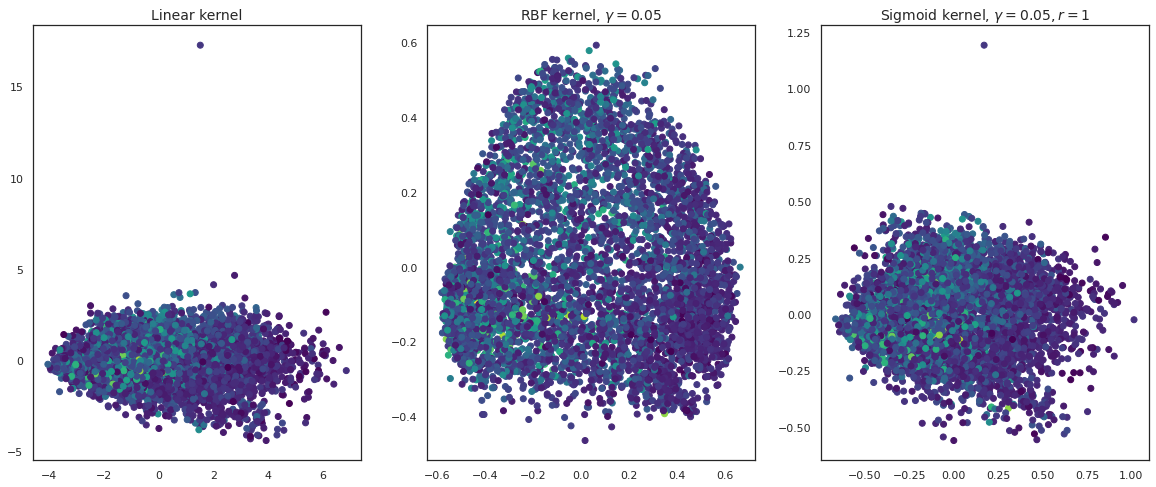

In [295]:
 #loop over methods and plot the projection of the Swiss roll
plt.figure(figsize=(20, 8))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), 
                            (132, rbf_pca, "RBF kernel, $\gamma=0.05$"), 
                            (133, sig_pca, "Sigmoid kernel, $\gamma=0.05, r=1$")):
    X_reduced = pca.fit_transform(X)
    
    plt.subplot(subplot), plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df.hpi, cmap="viridis")

The scatter plots are coloured by the house price.

Note that the new dimensions above are not a linear combination of the original features. Therefore, we can't interpret the meaning of the new dimensions.

To interpret these plots, you can check the following questions:

- Are the areas of similar median house price clustered?
- Are the high-price and low-price areas separable in the new 2-D space?

The Kernel PCA above has several key hyperparameters: the kernel type and the settings associated with the kernel function, such as the gamma of rbf kernel.

The hyperparamters might influence the performance of dimension reduction.

We can tune these hyperparameters using the performance of a logistic regression and the 'MEDV' variable. The idea is: A 'good' new 2D space is likely to separate high-price and low-price areas. Therefore, we will construct a logit regression model to classify the areas over and below the average median-house-price in the new space. The hyperparameter combination that leads to the best classification performance of areas is the optimal setting for this kernel PCA.

In [297]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# create a new y variable: 1 indicates above median price and 0 indicates otherwise
y = df.hpi > np.mean(df.hpi)

# a pipeline is a way of concatenating many analysis steps. Will introduce the Pipeline in later workshops.
# here clf will first do the Kernel PCA and then perform a logistic regression 
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

# two hyperparamters will be tuned: kernel type, and the gamma of the kernel
param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.1, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)
print(grid_search.best_params_)

{'kpca__gamma': 0.1, 'kpca__kernel': 'rbf'}


Now, you can use the optimal hyperparameters to rerun the kernel PCA.

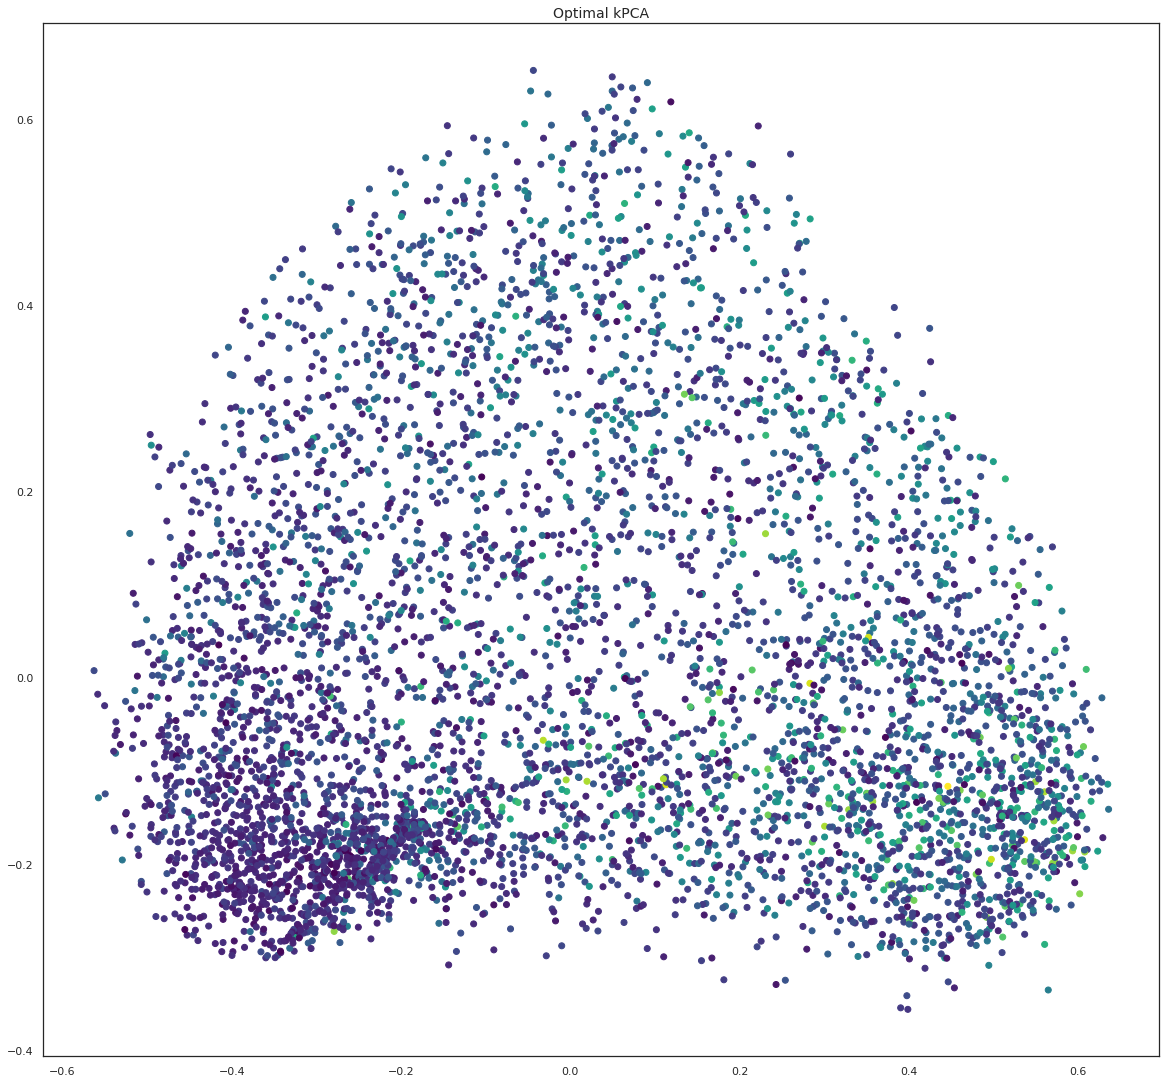

In [298]:
k_pca_opt = KernelPCA(n_components = 2, kernel=grid_search.best_params_['kpca__kernel'], 
                      gamma=grid_search.best_params_['kpca__gamma'], fit_inverse_transform=True)

plt.figure(figsize=(20, 19))
X_reduced = k_pca_opt.fit_transform(X)  
plt.title('Optimal kPCA', fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df.hpi, cmap="viridis")

NOTE
the two new dimensions(from the kernelPCA) plotted here cannot be interpreted, we dont know the meaning of them.
But we can look at the points:  the high house prices are more separated from the low house prices in this optimal kernelPCA. 
Potential purpose: prediction, not interpretation 

## Random Forest after PCA

https://medium.com/pursuitnotes/random-forest-regression-in-5-steps-with-python-2463b7ae9af8
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
https://mljar.com/blog/visualize-tree-from-random-forest/

In this section, we will use the random forest method for this dataset.

In [314]:
X_two_pc

array([[ 6.15455261, -1.02268982,  1.45103837,  0.03415925],
       [ 4.41425853,  2.43926347,  5.8389079 , -1.89064606],
       [ 5.62075863,  0.76948994,  0.45325802, -0.44802378],
       ...,
       [-3.97224726, -0.40887181, -0.05895522,  0.75184403],
       [-3.71458283, -0.44343405, -0.20221466,  0.44231747],
       [-4.05415118, -0.21823982,  0.20296813,  0.32301545]])

In [325]:
# We apply train_test_split twice to obtain the three train, dev and test sets
X_train, X_test, y_train, y_test = train_test_split(X_two_pc, y,test_size=0.3, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)

In [326]:
#from sklearn.ensemble import RandomForestRegressor
reg_random_forest = RandomForestRegressor(random_state=random_state)
reg_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

We can check the R2 score of this model.

In [327]:
print("R2 on the training data:")
print(reg_random_forest.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(reg_random_forest.score(X= X_test, y= y_test))

R2 on the training data:
0.8787999826859685
R2 on the testing data:
0.13995801558925014


much worse performance on the testing data, overfitting. 
what if i use more componensts?

### Holdout validation

The documentation of **GridSearchCV** indicates different ways of specifying the **cv** parameter:
```
cv: int, cross-validation generator or an iterable, default=None
Determines the cross-validation splitting strategy. Possible inputs for cv are:

- None, to use the default 5-fold cross validation,

- integer, to specify the number of folds in a (Stratified)KFold,

- CV splitter,

- An iterable yielding (train, test) splits as arrays of indices.
```

To use holdout validation, we can set the cv as a list of (train, test) that indicates the indices of training and testing data.

In [328]:
#X_train, X_test, y_train, y_test = train_test_split(X_three_pc, y,test_size=0.3, random_state=1)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1024)

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_val = pd.DataFrame(X_val)
y_val = pd.DataFrame(y_val)
# merge training and validation data, as required by GridSearchCV
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])                       

# the index list of training and validation data in the merged dataset
# in X_train_val, the first n rows are from X_train and the remaining rows are from X_val. Here n=X_train.shape[0]
ind_train = list(range(X_train.shape[0]))
ind_val = list(range(X_train.shape[0], X_train_val.shape[0]))

In [329]:
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators':[10,50,100,150,200]}

randomState_rf = random_state
rf = RandomForestRegressor(random_state=randomState_rf)

# CV: An iterable yielding (train, test) splits as arrays of indices.
clf = model_selection.GridSearchCV(rf, parameters, cv=[(ind_train, ind_val)])

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataCon

The best parameter value is: 
{'n_estimators': 150}
The best score is: 
0.14207972472373653


Now, print out the optimal number of trees. Note that if you change the random_state in the ```RandomForestRegressor```, you may get a different ```best_params_``` but the ```best_score_``` is quite similar across different runs. This is because the randomisation in creating ```RandomForestRegressor```.

We can create the final random forest model using the optimal parameters.

In [330]:
rf_final = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'], random_state=randomState_rf)
rf_final.fit(X_train, y_train)

/tmp/ipykernel_856/3190854359.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_final.fit(X_train, y_train)


RandomForestRegressor(n_estimators=150, random_state=42)

After tuning the hyperparameters, we are able to evaluate the performance of the model to inspect bias and variance.

Note that the score on teh validation data is the same as the ```clf.best_score_```.

In [331]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.8805517757625179
The score on the development data:
0.14207972472373653


NOTE: cross- validation is more robust, but is more computational intensive

### Cross-validation

We have used the cross validation function in the workshop for classification in Week 7. 

**This method is preferred over the holdout validation method in real-world machine learning projects, as it is more robust.**

In [332]:
# we merge the training and validation data and use the merged data for cross validation
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

In [333]:
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators':[10,20,30,40,50,70,100,150,200]}
rf = RandomForestRegressor()

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataCon

The best parameter value is: 
{'n_estimators': 200}
The best score is: 
0.13997225104330627


Sometimes, it is helpful to plot the influence of a single hyperparameter on the training and development score to find out whether the model is overfitting or underfitting. This plot is called **Validation curve**.

The function ```validation_score``` is helpful in this case. Similar to ```GridSearchCV```, this function is based on cross-validation.

In [ ]:
n_estimators_range = [10,20,30,40,50,70,100,150,200]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

In [ ]:
# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.1, 2.0)
lw = 2
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

It looks like the training and development scores do not change significantly with the number of trees, which means that the model is quite robust to this number of trees in the random forest.

You can pick up the point where the gap between training and cross-validation score reaches the minimum as the selected hyperparameter.

*Extension*: Try to optimise other hyperparameters as well, such as `max_depth`. You can achieve this by tweaking the definition of ```parameters``` in the above cell. You can also simultineously optimise multiple hyperparameters.

#### GBDT and XGBoost

A GBDT (Gradient Boosting Decision Tree) model will be used and compared to the previous models. 

The main difference to The random forest, is that in this ensemble learning the models are trained sequentially using the results of previous models as an input to the next(by assigning lower weight to correctly predicted outcomes and higher weight to the wrongly predicted outcomes) [LINK](https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663)

The [XGBoost](https://xgboost.readthedocs.io/en/stable/parameter.html) package will be used for this

In [84]:
# ! pip install XGBoost

In [334]:
#import xgboost as xgb

#create the XGB boost model with default hyperparameters
xgb_model = xgb.XGBRegressor(random_state = random_state)

#fit the model the training set
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Compare the perfomance of the XGBmodel on the training and testing set:

In [335]:
print("R2 on the training data:")
print(xgb_model.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(xgb_model.score(X=X_test, y=y_test))

R2 on the training data:
0.7968128278252397
R2 on the testing data:
0.09017390131446079


The XGB model seems to perform better than the previous models on the testing set, but this uncalibrated model does not perform well on the testing data

## Model comparison

We have built a range of regression models. Now we can collate these models and compare their performance.

In [336]:
# create a list of models
list_name_models = ['LR_VIF', 'LR_LASSO', 'CART', 'RF', 'GBDT']
# use the models from above
list_reg_models = [lr, lasso_model, reg_tree, reg_random_forest, xgb_model]

dict_models = dict()

# Element of dict_models: {'LR_VIF': [train_R2, test_R2]}

# Example
# data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
# pd.DataFrame.from_dict(data, orient='index')
#        0  1  2  3
# row_1  3  2  1  0
# row_2  a  b  c  d

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y)]
    else:
        dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data'])
print(df_models)
# you can then export df_models as a csv file and use it in MS Excel or Word

NameError: name 'reg_tree' is not defined

### ANN

[link](https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/)

This template can be used to fit the Deep Learning ANN regression model on any given dataset.

You can take the pre-processing steps of raw data from any of the case studies here.

Deep ANNs work great when you have a good amount of data available for learning. For small datasets with less than 50K records, I will recommend using the supervised ML models like Random Forests, Adaboosts, XGBoosts, etc.

The simple reason behind this is the high complexity and large computations of ANN. It is not worth it, if you can achieve the same accuracy with a faster and simpler model.

You look at deep learning ANNs only when you have a large amount of data available and the other algorithms are failing or do not fit for the task.

In [ ]:
### Final model comparison

<a id="ID_results"></a>
## 6.0 | Results

<a id="ID_disc"></a>
## 7.0 | Discussion 

NOTES:
    
* need 2-3 visualisations

e.g.

1. feature importance plots
2. table of model comparison + PCA comparison?
3. scatter plots


Limitations:
    
spatial autocorrelation - spatial dimension [PAPER: Examining the spatial relationship between environmental health factors and
house prices: NO 2 problem?]


2020-2021 covid


spatial unit


number of entries


improve: classification? low, medium and high house prices 


<a id="ID_conc"></a>
## 8.0 | Conclusion

<a id="ID_biblio"></a>
## Bibliography

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29

https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf

<a id="ID_append"></a>
## Appendix

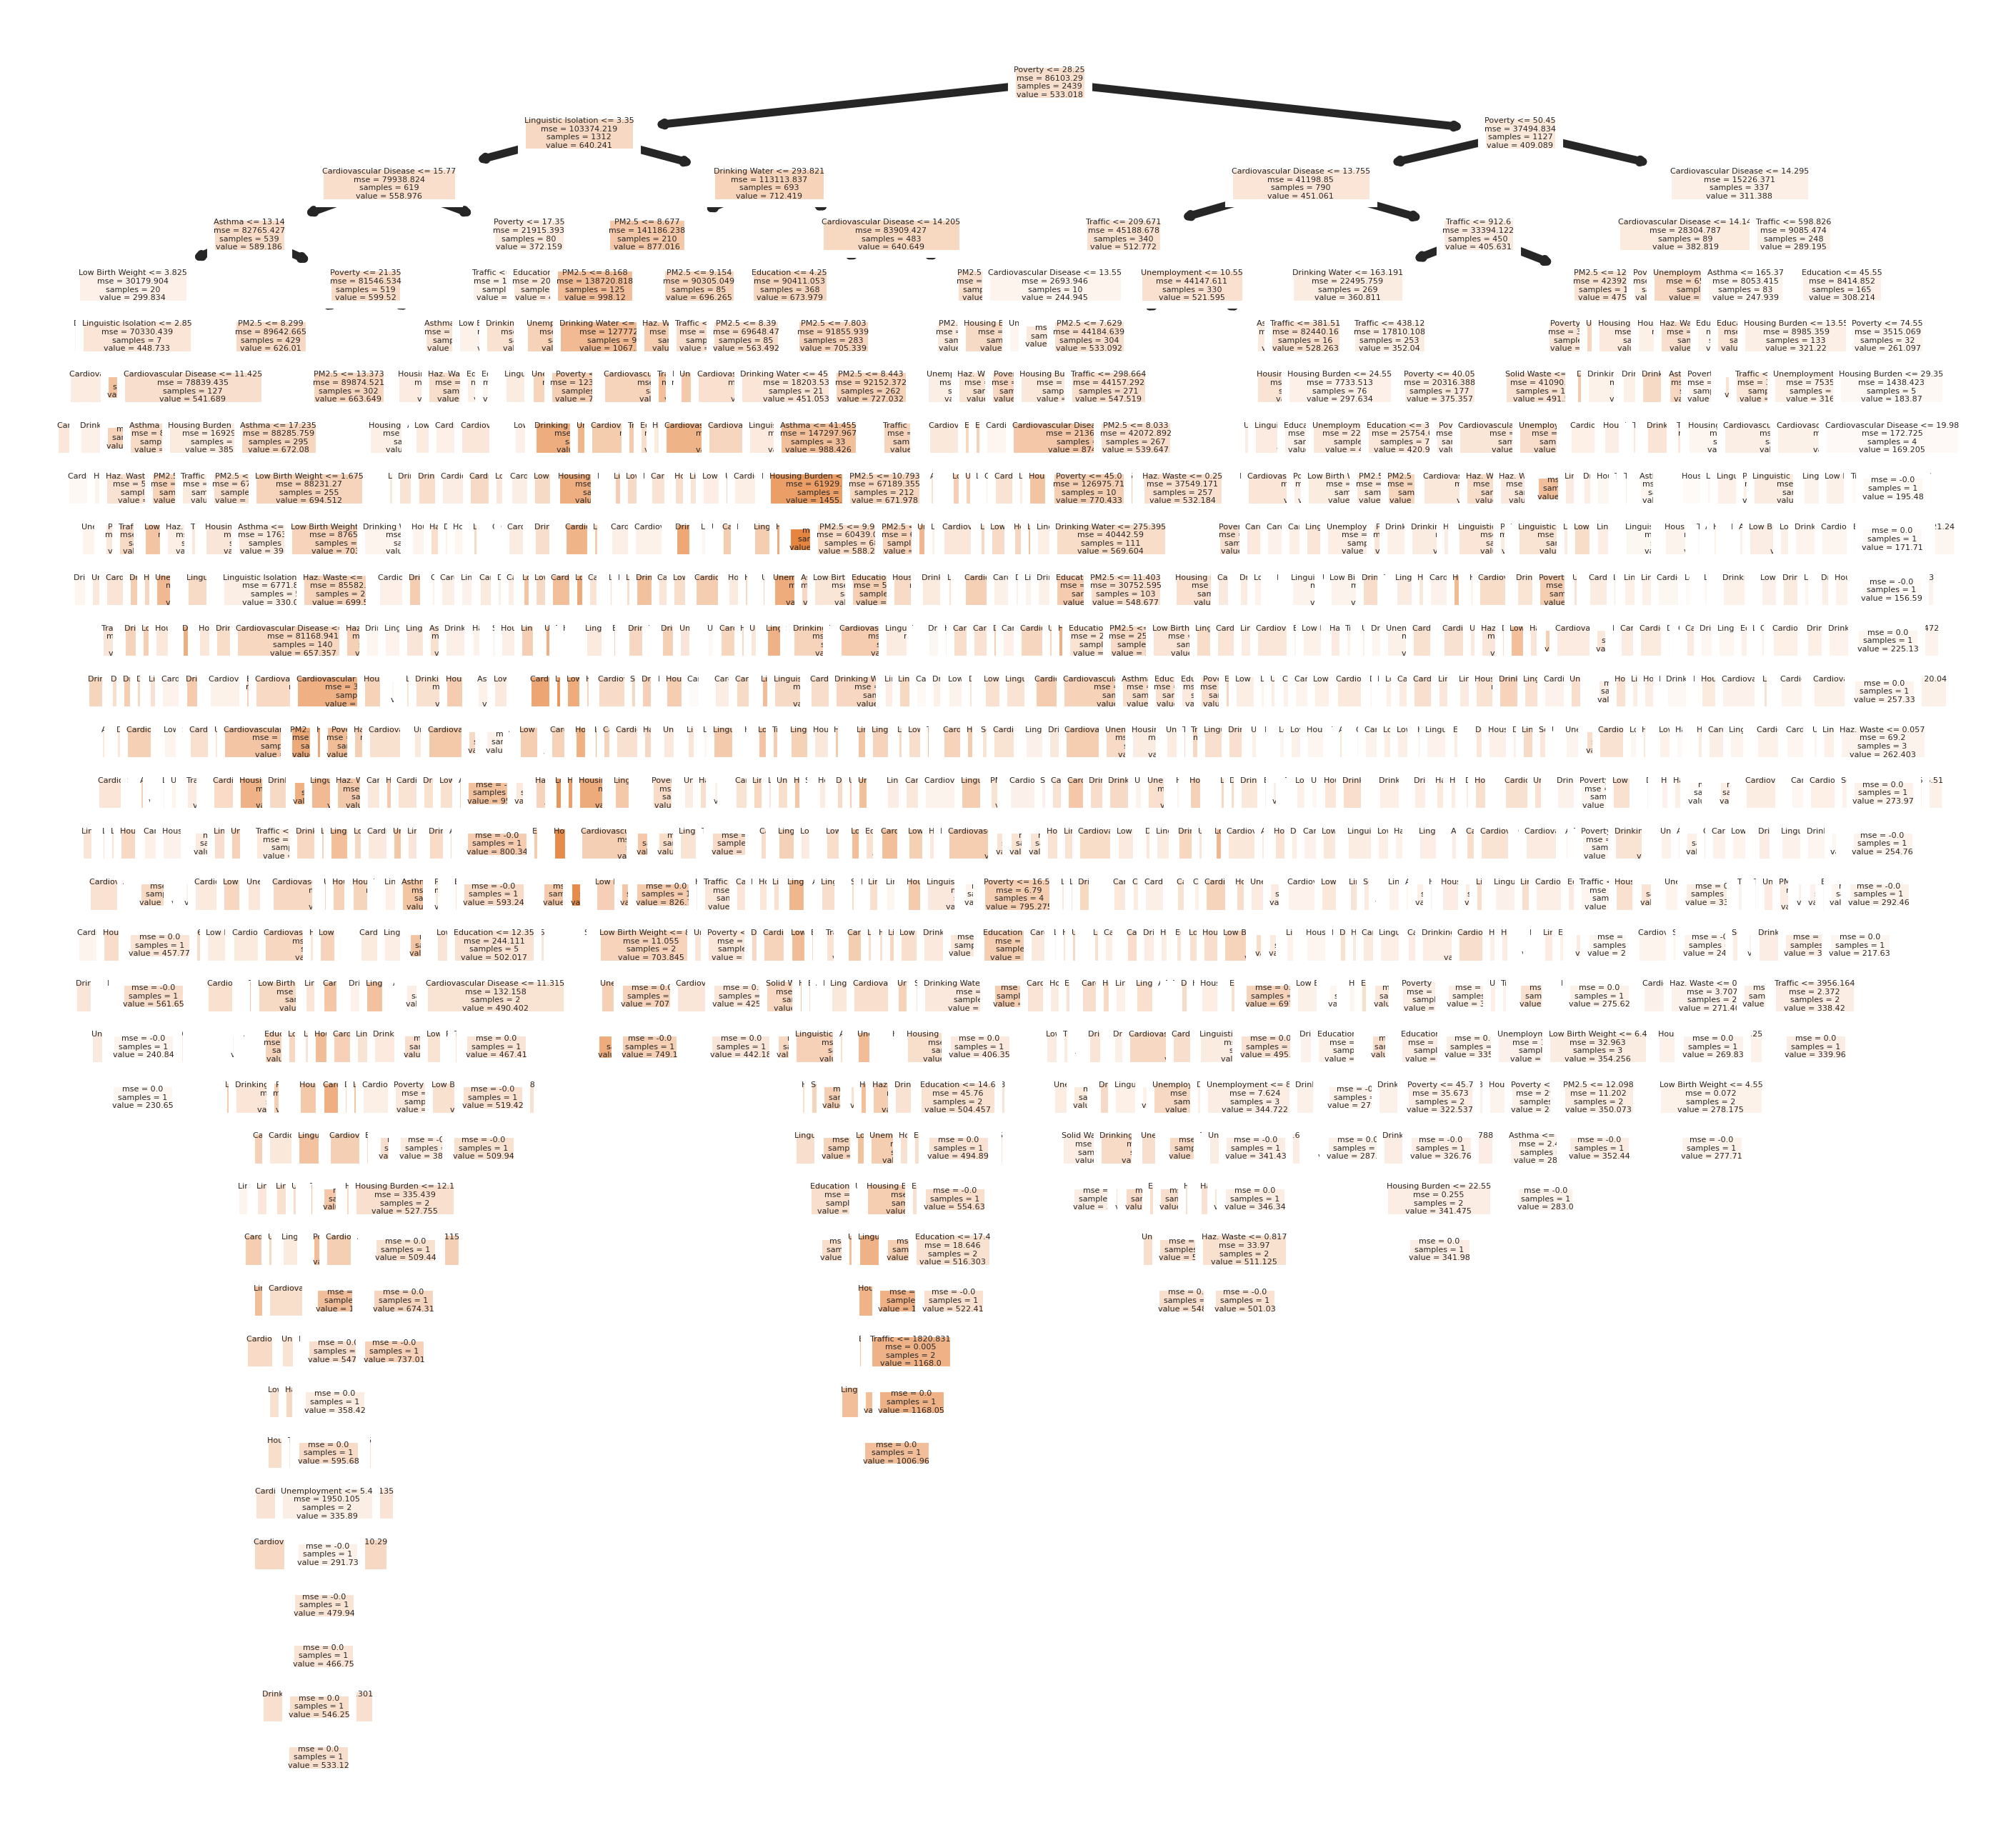

In [ ]:
# code from https://github.com/UCL-DSS/random-forest-workshop/blob/main/Workshop.ipynb
from sklearn import tree

import numpy as np
a = np.array(y_test.unique())
a = a.astype('<U10')
a

for x in range (45, 50):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    tree.plot_tree(rfc_final.estimators_[x],
                   feature_names = X.columns, 
                   class_names = a,
                   filled = True);